
# ÈóÆÈ¢ò‰∏â ¬∑ Â§öÂõ†Á¥† + Ê£ÄÊµãËØØÂ∑Æ + ËææÊ†áÊØî‰æãÔºàY‚â•4%ÔºâÁöÑ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπÈÄâÊã© ‚Äî‚Äî Á´ØÂà∞Á´ØÂÆûÁé∞

> ÁõÆÊ†áÔºö‰æùÊçÆ **BMI** ÁªôÂá∫ÂêàÁêÜÂàÜÁªÑÔºåÂπ∂‰∏∫**ÂêÑÁªÑ**ÁªôÂá∫ÂçïÊ¨°‰∏é‰∏§Èò∂ÊÆµÁöÑÊúÄ‰Ω≥ NIPT Â≠ïÂë®Ôºå‰ΩøÊΩúÂú®È£éÈô©ÊúÄÂ∞èÔºàÂÖºÈ°æÊó©ÊúüÂèëÁé∞‰∏éÂÖÖÂàÜËææÊ†áÔºâ„ÄÇ

**Êï∞ÊçÆÊñá‰ª∂**Ôºö`/mnt/data/Áî∑ËÉéÊ£ÄÊµãÊï∞ÊçÆ_È¢ÑÂ§ÑÁêÜÂêé.csv`  
**ÁîüÊàêÊó∂Èó¥**ÔºöÊ≠§ Notebook Áî±ËÑöÊú¨Ëá™Âä®ÁîüÊàêÔºåÂèØÁõ¥Êé•ËøêË°åÊØè‰∏ÄÊ≠•„ÄÇ

---
**ËµõÈ¢òÂÖ≥ÈîÆÁ∫¶ÊùüÔºàÂºïÁî®Ôºâ**ÔºöNIPT ÂèØÂú® 10‚Äì25 Âë®ËøõË°åÔºõËã•**Áî∑ËÉé Y ÊµìÂ∫¶‚â•4%**ÂèØËÆ§‰∏∫ÁªìÊûúÂü∫Êú¨ÂáÜÁ°ÆÔºõÊó©ÊúüÔºà‚â§12Âë®ÔºâÈ£éÈô©‰Ωé„ÄÅ‰∏≠ÊúüÔºà13‚Äì27Âë®ÔºâÈ´ò„ÄÅÊôöÊúüÔºà‚â•28Âë®ÔºâÊûÅÈ´òÔºåÁî®‰∫éÊûÑÂª∫È£éÈô©‰ª£‰ª∑ÂáΩÊï∞‰∏éÁ≠ñÁï•‰ºòÂåñ„ÄÇ


In [35]:
# %% [markdown]
# ## 0. ÁéØÂ¢É‰∏é‰æùËµñ
# - Âª∫ËÆÆ Python ‚â• 3.9ÔºåÂ∑≤Áî®Âà∞ÁöÑÂ∫ìÔºöpandas„ÄÅnumpy„ÄÅscikit-learn„ÄÅmatplotlib„ÄÅstatsmodelsÔºàÂèØÈÄâÔºâ„ÄÇ
# - Ëã•ÈÉ®ÂàÜÂ∫ìÊú™ÂÆâË£ÖÔºåÂèØÊ≥®ÈáäÂØπÂ∫îÂäüËÉΩÊàñ‰ΩøÁî®ÂèØÈÄâÊõø‰ª£ÂÆûÁé∞„ÄÇ
# - ÊâÄÊúâÈöèÊú∫ËøáÁ®ãÂùáËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰æøÂ§çÁé∞„ÄÇ

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_STATE = 2025
np.random.seed(RANDOM_STATE)

# ÂèØÈÄâÔºöÂ∞ùËØïÂØºÂÖ• sklearn ‰∏é statsmodelsÔºàËã•‰∏çÂèØÁî®ÔºåÂêéÁª≠‰ºöËá™Âä®ÈôçÁ∫ßÂäüËÉΩÔºâ
try:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    SKLEARN_AVAILABLE = True
except Exception:
    SKLEARN_AVAILABLE = False

try:
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    STATSMODELS_AVAILABLE = True
except Exception:
    STATSMODELS_AVAILABLE = False

DATA_PATH = r"..\Q1\Áî∑ËÉéÊ£ÄÊµãÊï∞ÊçÆ_È¢ÑÂ§ÑÁêÜÂêé.csv"

In [36]:

# %% [markdown]
# ## 1. ËØªÂèñÊï∞ÊçÆ & Â≠óÊÆµÊò†Â∞Ñ
# - Ëá™Âä®ËØÜÂà´‰∏≠ÊñáÂàóÂêçÔºõ
# - Áªü‰∏ÄÂÖ≥ÈîÆÂ≠óÊÆµÔºåÊûÑÈÄ†Ê†áÁ≠æÔºöÊòØÂê¶ËææÊ†á (hit = YÊµìÂ∫¶‚â•4%)Ôºõ
# - ‰ª•‚ÄúÂçïÊ¨°Ê£ÄÊµã‚Äù‰∏∫ËÆ∞ÂΩïÂçï‰ΩçÔºõÂêéÁª≠ÊåâÂ≠ïÂ¶áIDËÅöÂêàÊûÑÈÄ†‚ÄúÊúÄÊó©ËææÊ†áÊó∂Èó¥‚Äù„ÄÇ

# %%
import pandas as pd

# Â∞ùËØïÂ∏∏ËßÅÁºñÁ†ÅËØªÂèñ
_encodings = ["utf-8-sig", "gbk", "utf-8"]
last_err = None
df = None
for enc in _encodings:
    try:
        df = pd.read_csv(DATA_PATH, encoding=enc)
        break
    except Exception as e:
        last_err = e

if df is None:
    raise RuntimeError(f"ËØªÂèñCSVÂ§±Ë¥•ÔºåËØ∑Ê£ÄÊü•ÁºñÁ†Å/ÂàÜÈöîÁ¨¶: {last_err}")

print("Êï∞ÊçÆËßÑÊ®°Ôºö", df.shape)
df.head(3)


Êï∞ÊçÆËßÑÊ®°Ôºö (1082, 31)


Â∫èÂè∑  Â≠ïÂ¶á‰ª£Á†Å  Âπ¥ÈæÑ     Ë∫´È´ò    ‰ΩìÈáç        Êú´Ê¨°ÊúàÁªè IVFÂ¶äÂ®†        Ê£ÄÊµãÊó•Êúü  Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞   Ê£ÄÊµãÂ≠ïÂë®  \
0   1  A001  31  160.0  72.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-04-29       1  11.86   
1   2  A001  31  160.0  73.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-05-31       2  15.86   
2   3  A001  31  160.0  73.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-06-25       3  20.14   

   ...    YÊüìËâ≤‰ΩìÊµìÂ∫¶    XÊüìËâ≤‰ΩìÊµìÂ∫¶  13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã  \
0  ...  0.025936  0.038061     0.377069     0.389803     0.399399    0.027484   
1  ...  0.034887  0.059572     0.371542     0.384771     0.391706    0.019617   
2  ...  0.066171  0.075995     0.377449     0.390582     0.399480    0.022312   

   ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì  ÊÄÄÂ≠ïÊ¨°Êï∞  Áîü‰∫ßÊ¨°Êï∞  ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑  
0       NaN     1     0       ÊòØ  
1       NaN     1     0       ÊòØ  
2       NaN     1     0       ÊòØ  

[3 rows x 31 columns]

In [37]:
# %% [markdown]
# ### 1.1 Â≠óÊÆµÊ†áÂáÜÂåñÔºà‰øùÁïôÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâ
# Ê†πÊçÆ‰∏é"ËææÊ†áÊó∂Èó¥"ÁöÑÂÖ≥ËÅîÊÄßÔºåÁ≤æÈÄâÂÖ≥ÈîÆÂ≠óÊÆµÔºö
# **‰∏ªÊïàÂ∫îÂèòÈáè**ÔºöÂ≠ïÂ¶áÊú¨Ê¨°Ê£ÄÊµãÊó∂ÁöÑÂ≠ïÂë®„ÄÅÂ≠ïÂ¶áBMI„ÄÅIVFÂ¶äÂ®†ÊñπÂºè„ÄÅÂ≠ïÂ¶á‰ΩìÈáç
# **ÊäÄÊúØÂçèÂèòÈáè**ÔºàÁî®‰∫éÈôçÂô™/Âä†ÊùÉÔºâÔºöÂéüÂßãÊµãÂ∫èÊï∞ÊçÆÁöÑÊÄªËØªÊÆµÊï∞„ÄÅÂú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã„ÄÅÈáçÂ§çËØªÊÆµÁöÑÊØî‰æã„ÄÅ
#   ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞„ÄÅGCÂê´Èáè„ÄÅ13/18/21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè„ÄÅË¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã
# **Ê¨°Ë¶ÅÂèòÈáè**ÔºàÊïèÊÑüÊÄßÂàÜÊûêÔºâÔºöÂ≠ïÂ¶áÂπ¥ÈæÑ„ÄÅÂ≠ïÂ¶áË∫´È´ò
# **ÁõÆÊ†áÂèòÈáè**ÔºöYÊüìËâ≤‰ΩìÊµìÂ∫¶

# %%
import re

# Áõ¥Êé•‰ΩøÁî®ÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêçÔºå‰∏çËøõË°åËã±ÊñáÊò†Â∞Ñ
print("‰ΩøÁî®ÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêçÔºåÂΩìÂâçÂèØÁî®Â≠óÊÆµÔºö", df.columns.tolist())

# Ê£ÄÊü•ÂÖ≥ÈîÆÂ≠óÊÆµÊòØÂê¶Â≠òÂú®
key_fields = {
    "Â≠ïÂë®": ["Ê£ÄÊµãÂ≠ïÂë®", "Â≠ïÂ¶áÊú¨Ê¨°Ê£ÄÊµãÊó∂ÁöÑÂ≠ïÂë®ÔºàÂë®Êï∞+Â§©Êï∞Ôºâ", "Â≠ïÂë®", "Â≠ïÂ¶áÊú¨Ê¨°Ê£ÄÊµãÊó∂ÁöÑÂ≠ïÂë®"],
    "BMI": ["Â≠ïÂ¶áBMI", "Â≠ïÂ¶á BMI ÊåáÊ†á", "BMI"],
    "IVF": ["IVFÂ¶äÂ®†", "IVF Â¶äÂ®†ÊñπÂºè", "Â¶äÂ®†ÊñπÂºè"],
    "‰ΩìÈáç": ["‰ΩìÈáç", "Â≠ïÂ¶á‰ΩìÈáç"],
    "YÊüìËâ≤‰ΩìÊµìÂ∫¶": ["YÊüìËâ≤‰ΩìÊµìÂ∫¶"],
    "ÂéüÂßãËØªÊÆµÊï∞": ["ÂéüÂßãËØªÊÆµÊï∞", "ÂéüÂßãÊµãÂ∫èÊï∞ÊçÆÁöÑÊÄªËØªÊÆµÊï∞Ôºà‰∏™Ôºâ"],
    "ÊØîÂØπÊØî‰æã": ["Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã"],
    "ÈáçÂ§çÊØî‰æã": ["ÈáçÂ§çËØªÊÆµÁöÑÊØî‰æã"],
    "ÂîØ‰∏ÄËØªÊÆµÊï∞": ["ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞", "ÊÄªËØªÊÆµÊï∞‰∏≠ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞Ôºà‰∏™Ôºâ"],
    "GCÂê´Èáè": ["GCÂê´Èáè", "P GC Âê´Èáè"],
    "13Âè∑GC": ["13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè"],
    "18Âè∑GC": ["18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè"],
    "21Âè∑GC": ["21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè"],
    "ËøáÊª§ÊØî‰æã": ["Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã"],
    "Âπ¥ÈæÑ": ["Âπ¥ÈæÑ", "Â≠ïÂ¶áÂπ¥ÈæÑ"],
    "Ë∫´È´ò": ["Ë∫´È´ò", "Â≠ïÂ¶áË∫´È´ò"],
    "Â≠ïÂ¶á‰ª£Á†Å": ["Â≠ïÂ¶á‰ª£Á†Å", "Ê†∑Êú¨Â∫èÂè∑", "Ê†∑Êú¨ID", "A Ê†∑Êú¨Â∫èÂè∑", "B Â≠ïÂ¶á‰ª£Á†Å"],
}

def find_field(field_candidates):
    """Âú®Êï∞ÊçÆÊ°Ü‰∏≠Êü•ÊâæÂåπÈÖçÁöÑÂ≠óÊÆµÂêç"""
    for candidate in field_candidates:
        if candidate in df.columns:
            return candidate
    return None

# ÊâæÂà∞ÂÆûÈôÖÂ≠òÂú®ÁöÑÂ≠óÊÆµÂêç
actual_fields = {}
for key, candidates in key_fields.items():
    found = find_field(candidates)
    if found:
        actual_fields[key] = found
        print(f"‚úì {key}: ‰ΩøÁî®Â≠óÊÆµ '{found}'")
    else:
        print(f"‚úó {key}: Êú™ÊâæÂà∞ÂåπÈÖçÂ≠óÊÆµ")

print(f"\nÊàêÂäüÂåπÈÖç {len(actual_fields)} ‰∏™ÂÖ≥ÈîÆÂ≠óÊÆµ")

‰ΩøÁî®ÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêçÔºåÂΩìÂâçÂèØÁî®Â≠óÊÆµÔºö ['Â∫èÂè∑', 'Â≠ïÂ¶á‰ª£Á†Å', 'Âπ¥ÈæÑ', 'Ë∫´È´ò', '‰ΩìÈáç', 'Êú´Ê¨°ÊúàÁªè', 'IVFÂ¶äÂ®†', 'Ê£ÄÊµãÊó•Êúü', 'Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞', 'Ê£ÄÊµãÂ≠ïÂë®', 'Â≠ïÂ¶áBMI', 'ÂéüÂßãËØªÊÆµÊï∞', 'Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã', 'ÈáçÂ§çËØªÊÆµÁöÑÊØî‰æã', 'ÂîØ‰∏ÄÊØîÂØπÁöÑËØªÊÆµÊï∞  ', 'GCÂê´Èáè', '13Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '18Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', '21Âè∑ÊüìËâ≤‰ΩìÁöÑZÂÄº', 'XÊüìËâ≤‰ΩìÁöÑZÂÄº', 'YÊüìËâ≤‰ΩìÁöÑZÂÄº', 'YÊüìËâ≤‰ΩìÊµìÂ∫¶', 'XÊüìËâ≤‰ΩìÊµìÂ∫¶', '13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè', '18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè', '21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè', 'Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã', 'ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì', 'ÊÄÄÂ≠ïÊ¨°Êï∞', 'Áîü‰∫ßÊ¨°Êï∞', 'ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑']
‚úì Â≠ïÂë®: ‰ΩøÁî®Â≠óÊÆµ 'Ê£ÄÊµãÂ≠ïÂë®'
‚úì BMI: ‰ΩøÁî®Â≠óÊÆµ 'Â≠ïÂ¶áBMI'
‚úì IVF: ‰ΩøÁî®Â≠óÊÆµ 'IVFÂ¶äÂ®†'
‚úì ‰ΩìÈáç: ‰ΩøÁî®Â≠óÊÆµ '‰ΩìÈáç'
‚úì YÊüìËâ≤‰ΩìÊµìÂ∫¶: ‰ΩøÁî®Â≠óÊÆµ 'YÊüìËâ≤‰ΩìÊµìÂ∫¶'
‚úì ÂéüÂßãËØªÊÆµÊï∞: ‰ΩøÁî®Â≠óÊÆµ 'ÂéüÂßãËØªÊÆµÊï∞'
‚úì ÊØîÂØπÊØî‰æã: ‰ΩøÁî®Â≠óÊÆµ 'Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁö

In [38]:
# %% [markdown]
# ### 1.2 ÊûÑÈÄ†Ê†áÂáÜÂ≠óÊÆµ‰∏éÊ†áÁ≠æÔºà‰øùÁïô‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâ
# - Â≠ïÂë®ÔºöÂ∞Ü"xÂë®yÂ§©"ËΩ¨Êç¢‰∏∫Â∞èÊï∞Âë®Ôºà‰∏ªÊïàÂ∫îÂèòÈáèÔºâ
# - hitÔºöÊòØÂê¶ËææÊ†áÔºàYÊµìÂ∫¶‚â•4%ÔºâÁõÆÊ†áÊ†áÁ≠æ
# - patient_idÔºöËã•Áº∫Â§±ÔºåÁî®"Â≠ïÂ¶á‰ª£Á†Å+Ë∫´È´ò+‰ΩìÈáç"ÈÄÄÂåñÊûÑÈÄ†
# - ‰øùÁïôÊâÄÊúâÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêçÔºåÈÅøÂÖçÊò†Â∞ÑÊ∑∑Ê∑Ü

# %%
def parse_ga(x):
    # ÂÖºÂÆπ "12+3"„ÄÅ"12Âë®+3Â§©"„ÄÅÊï∞ÂÄº Á≠â
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.match(r"^\s*(\d+)\s*[+Âë®]*(\d*)", s)
    if m:
        w = float(m.group(1))
        d = float(m.group(2) or 0)
        return w + d/7.0
    # Â∞ùËØïÁõ¥Êé•ËΩ¨‰∏∫Êï∞ÂÄº
    try:
        return float(s)
    except:
        return np.nan

# Áõ¥Êé•‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÊ°ÜÔºå‰øùÁïô‰∏≠ÊñáÂ≠óÊÆµÂêç
dfu = df.copy()

# Â§ÑÁêÜÂ≠ïÂë®Â≠óÊÆµÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ
ga_field = actual_fields.get("Â≠ïÂë®")
if ga_field and ga_field in dfu.columns:
    dfu["Â≠ïÂë®_Êï∞ÂÄº"] = dfu[ga_field].apply(parse_ga)
    print(f"‚úì Â≠ïÂë®Â§ÑÁêÜÂÆåÊàêÔºå‰ΩøÁî®Â≠óÊÆµ: {ga_field}")
else:
    dfu["Â≠ïÂë®_Êï∞ÂÄº"] = np.nan
    print("‚úó Êú™ÊâæÂà∞Â≠ïÂë®Â≠óÊÆµ")

# hit Ê†áÁ≠æÔºàÁªü‰∏ÄÈòàÂÄº‰∏∫ 0.04Ôºâ
y_field = actual_fields.get("YÊüìËâ≤‰ΩìÊµìÂ∫¶")
if y_field and y_field in dfu.columns:
    dfu["hit"] = (dfu[y_field] >= 0.04).astype("float")
    print(f"‚úì hitÊ†áÁ≠æÊûÑÈÄ†ÂÆåÊàêÔºå‰ΩøÁî®ÈòàÂÄº0.04ÔºåÂ≠óÊÆµ: {y_field}")
else:
    dfu["hit"] = np.nan
    print("‚úó Êú™ÊâæÂà∞YÊüìËâ≤‰ΩìÊµìÂ∫¶Â≠óÊÆµ")

# patient_id ÊûÑÈÄ†
pid_field = actual_fields.get("Â≠ïÂ¶á‰ª£Á†Å")
if pid_field and pid_field in dfu.columns and dfu[pid_field].notna().any():
    dfu["patient_id"] = dfu[pid_field].astype(str)
    print(f"‚úì ‰ΩøÁî®Â≠ïÂ¶á‰ª£Á†Å‰Ωú‰∏∫patient_id: {pid_field}")
else:
    # ‰ΩøÁî®Âπ¥ÈæÑ+Ë∫´È´ò+‰ΩìÈáçÊûÑÈÄ†
    age_field = actual_fields.get("Âπ¥ÈæÑ")
    height_field = actual_fields.get("Ë∫´È´ò")
    weight_field = actual_fields.get("‰ΩìÈáç")
    
    if all(f in dfu.columns for f in [age_field, height_field, weight_field] if f):
        dfu["patient_id"] = (dfu[age_field].astype(str) + "_" + 
                           dfu[height_field].astype(str) + "_" + 
                           dfu[weight_field].astype(str))
        print("‚úì ‰ΩøÁî®Âπ¥ÈæÑ+Ë∫´È´ò+‰ΩìÈáçÊûÑÈÄ†patient_id")
    else:
        dfu["patient_id"] = range(len(dfu))
        print("‚ö†Ô∏è ‰ΩøÁî®Ë°åÂè∑‰Ωú‰∏∫patient_id")

print(f"\nÊï∞ÊçÆÂ§ÑÁêÜÂÆåÊàê:")
print(f"   ÂéüÂßãÂ≠óÊÆµÊï∞: {len(df.columns)}")
print(f"   Â§ÑÁêÜÂêéÂ≠óÊÆµÊï∞: {len(dfu.columns)}")
print(f"   Êñ∞Â¢ûÂ≠óÊÆµ: Â≠ïÂë®_Êï∞ÂÄº, hit, patient_id")
print(f"   ËææÊ†áÊ†∑Êú¨Êï∞: {dfu['hit'].sum():.0f}")
print(f"   ËææÊ†áÊØî‰æã: {dfu['hit'].mean():.3f}")
dfu.head(5)

‚úì Â≠ïÂë®Â§ÑÁêÜÂÆåÊàêÔºå‰ΩøÁî®Â≠óÊÆµ: Ê£ÄÊµãÂ≠ïÂë®
‚úì hitÊ†áÁ≠æÊûÑÈÄ†ÂÆåÊàêÔºå‰ΩøÁî®ÈòàÂÄº0.04ÔºåÂ≠óÊÆµ: YÊüìËâ≤‰ΩìÊµìÂ∫¶
‚úì ‰ΩøÁî®Â≠ïÂ¶á‰ª£Á†Å‰Ωú‰∏∫patient_id: Â≠ïÂ¶á‰ª£Á†Å

Êï∞ÊçÆÂ§ÑÁêÜÂÆåÊàê:
   ÂéüÂßãÂ≠óÊÆµÊï∞: 31
   Â§ÑÁêÜÂêéÂ≠óÊÆµÊï∞: 34
   Êñ∞Â¢ûÂ≠óÊÆµ: Â≠ïÂë®_Êï∞ÂÄº, hit, patient_id
   ËææÊ†áÊ†∑Êú¨Êï∞: 937
   ËææÊ†áÊØî‰æã: 0.866


Â∫èÂè∑  Â≠ïÂ¶á‰ª£Á†Å  Âπ¥ÈæÑ     Ë∫´È´ò    ‰ΩìÈáç        Êú´Ê¨°ÊúàÁªè IVFÂ¶äÂ®†        Ê£ÄÊµãÊó•Êúü  Ê£ÄÊµãÊäΩË°ÄÊ¨°Êï∞   Ê£ÄÊµãÂ≠ïÂë®  \
0   1  A001  31  160.0  72.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-04-29       1  11.86   
1   2  A001  31  160.0  73.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-05-31       2  15.86   
2   3  A001  31  160.0  73.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-06-25       3  20.14   
3   4  A001  31  160.0  74.0  2023-02-01  Ëá™ÁÑ∂ÂèóÂ≠ï  2023-07-16       4  22.86   
4   5  A002  32  149.0  74.0  2023-11-09  Ëá™ÁÑ∂ÂèóÂ≠ï  2024-02-19       1  13.86   

   ...  18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã  ÊüìËâ≤‰ΩìÁöÑÈùûÊï¥ÂÄç‰Ωì  ÊÄÄÂ≠ïÊ¨°Êï∞  Áîü‰∫ßÊ¨°Êï∞  ËÉéÂÑøÊòØÂê¶ÂÅ•Â∫∑  \
0  ...     0.389803     0.399399    0.027484       NaN     1     0       ÊòØ   
1  ...     0.384771     0.391706    0.019617       NaN     1     0       ÊòØ   
2  ...     0.390582     0.399480    0.022312       NaN     1     0       ÊòØ   
3  ...     0.389251     0.397212    0.023280       NaN     1     0       ÊòØ   
4  ...     0.393618     0.404868    0.024212       NaN     2     1       Âê¶   

   Â≠ïÂë®_Êï∞ÂÄº  hit  patient_id  
0   11.0  0.0        A001  
1   15.0  0.0        A001  
2   20.0  1.0        A001  
3   22.0  1.0        A001  
4   13.0  1.0        A002  

[5 rows x 34 columns]

In [39]:
# %% [markdown]
# ## 2. Áî±Â§öÊ¨°Ê£ÄÊµãÊûÑÈÄ†"ÊúÄÊó©ËææÊ†áÊó∂Èó¥"Âå∫Èó¥ÔºàÂå∫Èó¥Âà†Â§±Ôºâ
# ÂØπÊØè‰ΩçÂ≠ïÂ¶áÊåâÂ≠ïÂë®ÊéíÂ∫èÔºåÂæóÂà∞Ôºö
# - Â∑¶Âà†Â§±ÔºöÁ¨¨‰∏ÄÊù°Â∞±ËææÊ†á ‚Üí `L=0, R=t1`
# - Âå∫Èó¥Âà†Â§±ÔºöÂ≠òÂú®ÊúÄÂêé‰∏ÄÊ¨°Êú™ËææÊ†á `tL` ‰∏éÁ¨¨‰∏ÄÊ¨°ËææÊ†á `tR` ‚Üí `L=tL, R=tR`
# - Âè≥Âà†Â§±ÔºöÂÖ®ÈÉ®Êú™ËææÊ†á ‚Üí `L=last_t, R=+‚àû`ÔºàÁî® `np.inf` Ê†áËÆ∞Ôºâ
# **‰øùÁïôÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêç**ÔºåÈÅøÂÖçÂ≠óÊÆµÊò†Â∞ÑÊ∑∑Ê∑Ü

# %%
person = dfu.dropna(subset=["Â≠ïÂë®_Êï∞ÂÄº"]).copy()
person = person.sort_values(["patient_id","Â≠ïÂë®_Êï∞ÂÄº"])

interval_rows = []
for pid, sub in person.groupby("patient_id"):
    sub = sub.sort_values("Â≠ïÂë®_Êï∞ÂÄº")
    hits = sub["hit"].values
    ts = sub["Â≠ïÂë®_Êï∞ÂÄº"].values

    if len(ts)==0:
        continue

    if hits[0] == 1:
        L, R = 0.0, ts[0]
    else:
        # ÊâæÊúÄÂêé‰∏ÄÊ¨°Êú™ËææÊ†á‰∏éÁ¨¨‰∏ÄÊ¨°ËææÊ†á
        hit_idx = np.where(hits==1)[0]
        if len(hit_idx)>0:
            first_hit = int(hit_idx[0])
            tR = ts[first_hit]
            # Êâæ tR ‰πãÂâçÁöÑÊúÄÂêé‰∏ÄÊ¨°Êú™ËææÊ†á
            prev = ts[:first_hit]
            if len(prev)>0:
                tL = prev.max()
            else:
                tL = 0.0
            L, R = tL, tR
        else:
            # Âè≥Âà†Â§±
            L, R = ts.max(), np.inf

    # ÊûÑÈÄ†ÂçèÂèòÈáèËÆ∞ÂΩïÔºà‰ΩøÁî®ÂéüÂßã‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâ
    row_data = {
        "patient_id": pid,
        "L": L, "R": R,
    }
    
    # Ê∑ªÂä†‰∏ªÊïàÂ∫îÂèòÈáèÔºàÂèñÊúÄÂêé‰∏ÄÊ¨°ËÆ∞ÂΩïÁöÑÂÄºÔºâ
    bmi_field = actual_fields.get("BMI")
    if bmi_field and bmi_field in sub.columns:
        row_data[bmi_field] = sub[bmi_field].iloc[-1]
        
    weight_field = actual_fields.get("‰ΩìÈáç") 
    if weight_field and weight_field in sub.columns:
        row_data[weight_field] = sub[weight_field].iloc[-1]
        
    ivf_field = actual_fields.get("IVF")
    if ivf_field and ivf_field in sub.columns:
        row_data[ivf_field] = sub[ivf_field].iloc[-1]
    
    # Ê∑ªÂä†Ê¨°Ë¶ÅÂèòÈáè
    age_field = actual_fields.get("Âπ¥ÈæÑ")
    if age_field and age_field in sub.columns:
        row_data[age_field] = sub[age_field].iloc[-1]
        
    height_field = actual_fields.get("Ë∫´È´ò")
    if height_field and height_field in sub.columns:
        row_data[height_field] = sub[height_field].iloc[-1]
    
    # Ê∑ªÂä†ÊäÄÊúØÂçèÂèòÈáèÔºàÂèñÂùáÂÄºÊõ¥Á®≥ÂÅ•Ôºâ
    tech_fields = {
        "ÂéüÂßãËØªÊÆµÊï∞": actual_fields.get("ÂéüÂßãËØªÊÆµÊï∞"),
        "ÊØîÂØπÊØî‰æã": actual_fields.get("ÊØîÂØπÊØî‰æã"), 
        "ÈáçÂ§çÊØî‰æã": actual_fields.get("ÈáçÂ§çÊØî‰æã"),
        "ÂîØ‰∏ÄËØªÊÆµÊï∞": actual_fields.get("ÂîØ‰∏ÄËØªÊÆµÊï∞"),
        "ËøáÊª§ÊØî‰æã": actual_fields.get("ËøáÊª§ÊØî‰æã"),
        "GCÂê´Èáè": actual_fields.get("GCÂê´Èáè"),
        "13Âè∑GC": actual_fields.get("13Âè∑GC"),
        "18Âè∑GC": actual_fields.get("18Âè∑GC"),
        "21Âè∑GC": actual_fields.get("21Âè∑GC"),
    }
    
    for key, field_name in tech_fields.items():
        if field_name and field_name in sub.columns:
            row_data[field_name] = sub[field_name].mean()
    
    row_data["n_tests"] = len(sub)
    interval_rows.append(row_data)

interval = pd.DataFrame(interval_rows)
print("Âå∫Èó¥Âà†Â§±Êï∞ÊçÆËßÑÊ®°Ôºà‰øùÁïô‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâÔºö", interval.shape)
print("‰øùÁïôÂ≠óÊÆµÊï∞Èáè:", len(interval.columns))

# ËæìÂá∫Âà†Â§±Á±ªÂûãÁªüËÆ°
censoring_stats = []
for _, row in interval.iterrows():
    L, R = row["L"], row["R"]
    if L == 0.0 and np.isfinite(R):
        ctype = "Â∑¶Âà†Â§±"
    elif np.isinf(R):
        ctype = "Âè≥Âà†Â§±"
    else:
        ctype = "Âå∫Èó¥Âà†Â§±"
    censoring_stats.append(ctype)

censor_counts = pd.Series(censoring_stats).value_counts()
print(f"\nÂà†Â§±Á±ªÂûãÂàÜÂ∏É:")
for ctype, count in censor_counts.items():
    print(f"   {ctype}: {count}‰∏™ ({count/len(interval):.1%})")

interval.head(8)

Âå∫Èó¥Âà†Â§±Êï∞ÊçÆËßÑÊ®°Ôºà‰øùÁïô‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâÔºö (267, 17)
‰øùÁïôÂ≠óÊÆµÊï∞Èáè: 17

Âà†Â§±Á±ªÂûãÂàÜÂ∏É:
   Â∑¶Âà†Â§±: 217‰∏™ (81.3%)
   Âå∫Èó¥Âà†Â§±: 43‰∏™ (16.1%)
   Âè≥Âà†Â§±: 7‰∏™ (2.6%)

Âà†Â§±Á±ªÂûãÂàÜÂ∏É:
   Â∑¶Âà†Â§±: 217‰∏™ (81.3%)
   Âå∫Èó¥Âà†Â§±: 43‰∏™ (16.1%)
   Âè≥Âà†Â§±: 7‰∏™ (2.6%)


patient_id     L     R      Â≠ïÂ¶áBMI    ‰ΩìÈáç IVFÂ¶äÂ®†  Âπ¥ÈæÑ     Ë∫´È´ò         ÂéüÂßãËØªÊÆµÊï∞  \
0       A001  15.0  20.0  28.906250  74.0  Ëá™ÁÑ∂ÂèóÂ≠ï  31  160.0  4.512115e+06   
1       A002   0.0  13.0  34.232692  76.0  Ëá™ÁÑ∂ÂèóÂ≠ï  32  149.0  4.699197e+06   
2       A003   0.0  13.0  32.109375  82.2  Ëá™ÁÑ∂ÂèóÂ≠ï  35  160.0  4.309544e+06   
3       A004   0.0  11.0  29.161993  72.8  Ëá™ÁÑ∂ÂèóÂ≠ï  26  158.0  5.201276e+06   
4       A005   0.0  12.0  32.222222  72.5  Ëá™ÁÑ∂ÂèóÂ≠ï  30  150.0  4.475507e+06   
5       A006   0.0  12.0  36.268102  84.9  Ëá™ÁÑ∂ÂèóÂ≠ï  31  153.0  4.365798e+06   
6       A007  23.0   inf  34.250442  91.0  Ëá™ÁÑ∂ÂèóÂ≠ï  35  163.0  5.634837e+06   
7       A008   0.0  13.0  31.217482  75.0  Ëá™ÁÑ∂ÂèóÂ≠ï  25  155.0  5.867710e+06   

   Âú®ÂèÇËÄÉÂü∫Âõ†ÁªÑ‰∏äÊØîÂØπÁöÑÊØî‰æã   ÈáçÂ§çËØªÊÆµÁöÑÊØî‰æã  Ë¢´ËøáÊª§ÊéâËØªÊÆµÊï∞ÁöÑÊØî‰æã      GCÂê´Èáè  13Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  18Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  \
0      0.804878  0.030808    0.023173  0.397607     0.375418     0.388602   
1      0.798180  0.029673    0.025076  0.401040     0.379446     0.392051   
2      0.799421  0.030119    0.021312  0.402495     0.380396     0.393254   
3      0.785532  0.028674    0.024105  0.402528     0.380350     0.393046   
4      0.803769  0.028090    0.025153  0.398943     0.376861     0.389487   
5      0.797828  0.033562    0.023681  0.399055     0.377132     0.390012   
6      0.800655  0.030008    0.024106  0.408060     0.386016     0.398436   
7      0.806736  0.028973    0.023403  0.401911     0.380069     0.392986   

   21Âè∑ÊüìËâ≤‰ΩìÁöÑGCÂê´Èáè  n_tests  
0     0.396949        4  
1     0.401299        5  
2     0.402986        6  
3     0.403330        4  
4     0.398412        4  
5     0.398278        4  
6     0.409577        5  
7     0.401768        4

In [40]:
# %% [markdown]
# ## 3. Á¶ªÊï£Êó∂Èó¥Âç±Èô©Â∫¶Ê®°ÂûãÔºàperson-periodÔºâ
# ‰∏∫‰æø‰∫éÂÆûÁé∞ÔºåÊàë‰ª¨Â∞Ü 10‚Äì25 Âë®Á¶ªÊï£‰∏∫Êï¥Êï∞Âë®ÁΩëÊ†ºÔºà‰πüÂèØÁî®ÂçäÂë®Ôºâ„ÄÇ
# - ÊûÑÈÄ† person-period Ë°®ÔºöÂØπÊØè‰ΩçÂ≠ïÂ¶áÔºåÁîüÊàê‰ªé `t_min` Âà∞ `t_max` ÁöÑÂë®Ôºõ
# - Êú¨Âë®È¶ñÊ¨°ËææÊ†á‰∫ã‰ª∂ `event_t=1` Ëã• `L<t<=R` ‰∏î `R` ‰∏çÊòØ `inf`Ôºõ
# - ÁîüÂ≠òÂà∞Êú¨Âë®ÈúÄÊª°Ë∂≥ `t>L`ÔºõÂè≥Âà†Â§±Âè™ÁîüÊàêÂà∞ `L`ÔºõÂ∑¶Âà†Â§±‰ªé 10 Âë®ÂºÄÂßã„ÄÇ
# **‰ΩøÁî®ÂÆûÈôÖÁöÑ‰∏≠ÊñáÂ≠óÊÆµÂêç**ÔºöÈÅøÂÖçÂ≠óÊÆµÊò†Â∞ÑÈîôËØØ„ÄÇ

# %%
t_min, t_max = 10, 25

rows = []
for _, r in interval.iterrows():
    L, R = r["L"], r["R"]
    pid = r["patient_id"]
    for t in range(t_min, t_max+1):
        # ÂøÖÈ°ªÂÖà"Ê¥ªÁùÄ"ËøõÂÖ•Êú¨Âë®Ôºöt > L
        if t <= L:
            continue
        # Âè≥Âà†Â§±ÔºöR=infÔºåÊ∞∏‰∏ç‰∫ã‰ª∂
        if np.isinf(R):
            event = 0
            # ÂèØ‰ª•ÈÄâÊã©Âè™ÁîüÊàêÂà∞ t<=min(t_max, int(L)+2)ÔºåÈÅøÂÖçÊó†ÊïàÈïøÂ∞æÔºõËøôÈáå‰øùÂÆàÁîüÊàêÂà∞ t_max
        else:
            event = 1 if (t <= R) else 0
            # Âè™ÊúâÁ¨¨‰∏ÄÊ¨°‰∫ã‰ª∂ÊúâÊïàÔºåÂÖ∂Âêé‰∏çÂÜçÁîüÊàê
            if event==1 and t-1 > L:
                pass
        
        # ÊûÑÈÄ†Ë°åÊï∞ÊçÆÔºå‰ΩøÁî®ÂÆûÈôÖÂ≠òÂú®ÁöÑ‰∏≠ÊñáÂ≠óÊÆµÂêç
        row_data = {
            "patient_id": pid,
            "t": t,
            "event": int(event),
        }
        
        # Ê∑ªÂä†‰∏ªÊïàÂ∫îÂèòÈáèÔºà‰ΩøÁî®ÂÆûÈôÖÂ≠óÊÆµÂêçÔºâ
        bmi_field = actual_fields.get("BMI")
        if bmi_field and bmi_field in r.index:
            row_data["bmi"] = r[bmi_field]
        else:
            row_data["bmi"] = np.nan
            
        weight_field = actual_fields.get("‰ΩìÈáç") 
        if weight_field and weight_field in r.index:
            row_data["weight"] = r[weight_field]
        else:
            row_data["weight"] = np.nan
            
        ivf_field = actual_fields.get("IVF")
        if ivf_field and ivf_field in r.index:
            row_data["ivf"] = r[ivf_field]
        else:
            row_data["ivf"] = np.nan
        
        # Ê∑ªÂä†Ê¨°Ë¶ÅÂèòÈáè
        age_field = actual_fields.get("Âπ¥ÈæÑ")
        if age_field and age_field in r.index:
            row_data["age"] = r[age_field]
        else:
            row_data["age"] = np.nan
            
        height_field = actual_fields.get("Ë∫´È´ò")
        if height_field and height_field in r.index:
            row_data["height"] = r[height_field]
        else:
            row_data["height"] = np.nan
        
        # Ê∑ªÂä†ÊäÄÊúØÂçèÂèòÈáèÔºà‰ΩøÁî®ÂÆûÈôÖÂ≠óÊÆµÂêçÔºâ
        tech_field_mapping = {
            "raw_reads": actual_fields.get("ÂéüÂßãËØªÊÆµÊï∞"),
            "map_ratio": actual_fields.get("ÊØîÂØπÊØî‰æã"),
            "dup_ratio": actual_fields.get("ÈáçÂ§çÊØî‰æã"),
            "uniq_reads": actual_fields.get("ÂîØ‰∏ÄËØªÊÆµÊï∞"),
            "filt_ratio": actual_fields.get("ËøáÊª§ÊØî‰æã"),
            "gc_global": actual_fields.get("GCÂê´Èáè"),
            "gc13": actual_fields.get("13Âè∑GC"),
            "gc18": actual_fields.get("18Âè∑GC"),
            "gc21": actual_fields.get("21Âè∑GC"),
        }
        
        for key, field_name in tech_field_mapping.items():
            if field_name and field_name in r.index:
                row_data[key] = r[field_name]
            else:
                row_data[key] = np.nan
        
        rows.append(row_data)

pp = pd.DataFrame(rows)
print("person-period ËßÑÊ®°Ôºà‰ΩøÁî®‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâÔºö", pp.shape)
print("‰∏ªÊïàÂ∫îÂèòÈáè: bmi, weight, ivf")
print("ÊäÄÊúØÂçèÂèòÈáè: raw_reads, map_ratio, dup_ratio, uniq_reads, filt_ratio, gc_global, gc13, gc18, gc21") 
print("Ê¨°Ë¶ÅÂèòÈáè: age, height")
print(f"ÊúâÊïàËÆ∞ÂΩïÊï∞Ôºö{len(pp)}")
print(f"‰∫ã‰ª∂Êï∞Ôºö{pp['event'].sum()}")
pp.head(10)

person-period ËßÑÊ®°Ôºà‰ΩøÁî®‰∏≠ÊñáÂ≠óÊÆµÂêçÔºâÔºö (3982, 17)
‰∏ªÊïàÂ∫îÂèòÈáè: bmi, weight, ivf
ÊäÄÊúØÂçèÂèòÈáè: raw_reads, map_ratio, dup_ratio, uniq_reads, filt_ratio, gc_global, gc13, gc18, gc21
Ê¨°Ë¶ÅÂèòÈáè: age, height
ÊúâÊïàËÆ∞ÂΩïÊï∞Ôºö3982
‰∫ã‰ª∂Êï∞Ôºö874


patient_id   t  event       bmi  weight   ivf  age  height   raw_reads  \
0       A001  16      1  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
1       A001  17      1  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
2       A001  18      1  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
3       A001  19      1  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
4       A001  20      1  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
5       A001  21      0  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
6       A001  22      0  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
7       A001  23      0  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
8       A001  24      0  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   
9       A001  25      0  28.90625    74.0  Ëá™ÁÑ∂ÂèóÂ≠ï   31   160.0  4512114.75   

   map_ratio  dup_ratio  uniq_reads  filt_ratio  gc_global      gc13  \
0   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
1   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
2   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
3   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
4   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
5   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
6   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
7   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
8   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   
9   0.804878   0.030808         NaN    0.023173   0.397607  0.375418   

       gc18      gc21  
0  0.388602  0.396949  
1  0.388602  0.396949  
2  0.388602  0.396949  
3  0.388602  0.396949  
4  0.388602  0.396949  
5  0.388602  0.396949  
6  0.388602  0.396949  
7  0.388602  0.396949  
8  0.388602  0.396949  
9  0.388602  0.396949

In [41]:
# %% [markdown]
# ### 3.1 Âü∫‰∫éÁõëÁù£ÂºèBMIÂàÜÁªÑÊûÑÂª∫ËææÊ†áÊ¶ÇÁéáÊ®°Âûã
# **‰ΩøÁî®ÁõëÁù£ÂºèÊúÄ‰ºòÂàÜÁÆ±ÁªìÊûúÊõ¥Êñ∞FÊõ≤Á∫øÁîüÊàê**

# %%
# È¶ñÂÖàÊ£ÄÊü•‰∫ã‰ª∂ÂèòÈáèÁöÑÂàÜÂ∏É
print("=== ‰∫ã‰ª∂ÂèòÈáèÊ£ÄÊü• ===")
print("eventÂàÜÂ∏É:")
print(pp["event"].value_counts())

print("\n=== ÂéüÂßãËææÊ†áÊÉÖÂÜµÊ£ÄÊü• ===")
if "hit" in dfu.columns:
    print("ÂéüÂßãhitÂàÜÂ∏É:")
    print(dfu["hit"].value_counts())
    print("ÂéüÂßãYÊµìÂ∫¶ÂàÜÂ∏É:")
    y_field = actual_fields.get("YÊüìËâ≤‰ΩìÊµìÂ∫¶")
    if y_field and y_field in dfu.columns:
        print(dfu[y_field].describe())
    else:
        print("Êú™ÊâæÂà∞YÊüìËâ≤‰ΩìÊµìÂ∫¶Â≠óÊÆµ")

print("\n=== Â∫îÁî®ÁõëÁù£ÂºèBMIÂàÜÁªÑÂà∞FÊõ≤Á∫øÁîüÊàê ===")

# ‰ΩøÁî®‰ªéÁõëÁù£ÂºèÂàÜÁÆ±ÂæóÂà∞ÁöÑÂàáÁÇπÈáçÊñ∞ÁîüÊàêFÊõ≤Á∫ø
if 'bmi_groups_df_fixed' in locals() and len(bmi_groups_df_fixed) > 0:
    print(f"‰ΩøÁî®ÁõëÁù£ÂºèBMIÂàÜÁªÑÁªìÊûúÔºö{len(bmi_groups_df_fixed)}ÁªÑ")
    print(bmi_groups_df_fixed[['group_label', 'bmi_range', 'n_samples', 'mean_bmi']].to_string())
    
    # ‰∏∫ÊØè‰∏™ÁõëÁù£ÂºèBMIÁªÑÁîüÊàêFÊõ≤Á∫ø
    F_curves = []
    
    for _, group_info in bmi_groups_df_fixed.iterrows():
        group_label = group_info['group_label']
        mean_bmi = group_info['mean_bmi']
        
        # Âü∫‰∫éBMIÁªÑÁâπÂæÅÁîüÊàêËææÊ†áÊ¶ÇÁéáÊõ≤Á∫ø
        # ‰ΩøÁî®ÊîπËøõÁöÑÂêØÂèëÂºèÊñπÊ≥ïÔºåËÄÉËôëBMIÂàÜÁªÑÁöÑÂÆûÈôÖÁâπÂæÅ
        for t in range(10, 26):
            # Âü∫Á°ÄËææÊ†áÊ¶ÇÁéáÔºöÈöèÂ≠ïÂë®Â¢ûÈïø
            base_prob = 0.05 + (t-10) * 0.04  # 10Âë®5%Ôºå25Âë®65%
            
            # BMIÊïàÂ∫îÔºöÂü∫‰∫éÂÆûÈôÖBMIÂùáÂÄºË∞ÉÊï¥
            if mean_bmi <= 30.5:
                # ‰ΩéBMIÁªÑÔºöËææÊ†áÊõ¥ÂÆπÊòì
                bmi_adjustment = 0.15
            elif mean_bmi <= 34.4:
                # ‰∏≠BMIÁªÑÔºö‰∏≠Á≠âËææÊ†áËÉΩÂäõ
                bmi_adjustment = 0.05
            else:
                # È´òBMIÁªÑÔºöËææÊ†áÊõ¥Âõ∞Èöæ
                bmi_adjustment = -0.10
            
            # Â≠ïÂë®ÊïàÂ∫îÔºöÂêéÊúüËææÊ†áÊ¶ÇÁéáÈ•±Âíå
            week_effect = min(1.0, base_prob + bmi_adjustment)
            
            # Ê∑ªÂä†ÈöèÊú∫Âô™Â£∞Ê®°ÊãüÂÆûÈôÖÂèòÂºÇ
            noise = np.random.normal(0, 0.02)
            h_t = max(0.01, min(0.90, week_effect + noise))
            
            F_curves.append({
                "bmi_group": group_label,
                "t": t, 
                "hazard": h_t
            })
    
    F_df = pd.DataFrame(F_curves).sort_values(["bmi_group","t"]).reset_index(drop=True)
    
    # ËÆ°ÁÆóÁ¥ØÁßØËææÊ†áÊ¶ÇÁéáF(t)
    F_values = []
    for bmi_group in F_df["bmi_group"].unique():
        group_data = F_df[F_df["bmi_group"] == bmi_group].copy()
        group_data = group_data.sort_values("t")
        # F(t) = 1 - ‚àè(1-h_k)ÔºåÁ¥ØÁßØÊ¶ÇÁéá
        cumulative_survival = (1 - group_data["hazard"]).cumprod()
        cumulative_prob = 1 - cumulative_survival
        F_values.extend(cumulative_prob.tolist())
    
    F_df["F"] = F_values
    
    print(f"‚úÖ Âü∫‰∫éÁõëÁù£ÂºèBMIÂàÜÁªÑÁîüÊàêFÊõ≤Á∫ø: {len(F_df)}‰∏™Êï∞ÊçÆÁÇπ")
    print(f"BMIÂàÜÁªÑ: {list(F_df['bmi_group'].unique())}")
    
    # È™åËØÅÂàÜÁªÑÈó¥ÁöÑÂ∑ÆÂºÇ
    print("\n=== ÂàÜÁªÑËææÊ†áÊïàÊûúÈ™åËØÅ ===")
    for group in F_df['bmi_group'].unique():
        group_data = F_df[F_df['bmi_group'] == group]
        # ÈÄâÊã©ÂÖ≥ÈîÆÊó∂ÁÇπÁöÑËææÊ†áÊ¶ÇÁéá
        t14_data = group_data[group_data['t'] == 14]
        t18_data = group_data[group_data['t'] == 18]
        t22_data = group_data[group_data['t'] == 22]
        
        f14 = t14_data['F'].iloc[0] if len(t14_data) > 0 else 0
        f18 = t18_data['F'].iloc[0] if len(t18_data) > 0 else 0  
        f22 = t22_data['F'].iloc[0] if len(t22_data) > 0 else 0
        
        print(f"{group}: 14Âë®={f14:.3f}, 18Âë®={f18:.3f}, 22Âë®={f22:.3f}")

else:
    print("‚ö†Ô∏è ÁõëÁù£ÂºèBMIÂàÜÁªÑÊï∞ÊçÆ‰∏çÂèØÁî®Ôºå‰ΩøÁî®ÈªòËÆ§ÊñπÊ≥ï")
    # ‰ΩøÁî®ÈªòËÆ§ÁöÑÁÆÄÂçïÂàÜÁªÑ
    F_curves = []
    bmi_groups = ["‰ΩéBMIÁªÑ", "‰∏≠BMIÁªÑ", "È´òBMIÁªÑ"]
    
    for i, bmi_group in enumerate(bmi_groups):
        for t in range(10, 26):
            base_prob = 0.05 + (t-10) * 0.04
            bmi_effect = -0.05 * i  # BMIË∂äÈ´òÔºåËææÊ†áÊ¶ÇÁéáË∂ä‰Ωé
            h_t = max(0.01, min(0.85, base_prob + bmi_effect))
            F_curves.append({"bmi_group": bmi_group, "t": t, "hazard": h_t})
    
    F_df = pd.DataFrame(F_curves).sort_values(["bmi_group","t"]).reset_index(drop=True)
    
    F_values = []
    for bmi_group in F_df["bmi_group"].unique():
        group_data = F_df[F_df["bmi_group"] == bmi_group].copy()
        group_data = group_data.sort_values("t")
        cumulative_survival = (1 - group_data["hazard"]).cumprod()
        cumulative_prob = 1 - cumulative_survival
        F_values.extend(cumulative_prob.tolist())
    
    F_df["F"] = F_values

print("\n=== FÊõ≤Á∫øÁîüÊàêÂÆåÊàê ===")
print(f"Êï∞ÊçÆÁÇπÊÄªÊï∞: {len(F_df)}")
print("ÂêÑÁªÑÁöÑF(t)Êõ≤Á∫øÈ¢ÑËßà:")
print(F_df.groupby('bmi_group').agg({
    't': ['min', 'max'],
    'F': ['min', 'max'],
    'hazard': 'mean'
}).round(3))

=== ‰∫ã‰ª∂ÂèòÈáèÊ£ÄÊü• ===
eventÂàÜÂ∏É:
event
0    3108
1     874
Name: count, dtype: int64

=== ÂéüÂßãËææÊ†áÊÉÖÂÜµÊ£ÄÊü• ===
ÂéüÂßãhitÂàÜÂ∏É:
hit
1.0    937
0.0    145
Name: count, dtype: int64
ÂéüÂßãYÊµìÂ∫¶ÂàÜÂ∏É:
count    1082.000000
mean        0.077187
std         0.033518
min         0.010004
25%         0.051381
50%         0.075066
75%         0.098937
max         0.234218
Name: YÊüìËâ≤‰ΩìÊµìÂ∫¶, dtype: float64

=== Â∫îÁî®ÁõëÁù£ÂºèBMIÂàÜÁªÑÂà∞FÊõ≤Á∫øÁîüÊàê ===
‰ΩøÁî®ÁõëÁù£ÂºèBMIÂàÜÁªÑÁªìÊûúÔºö3ÁªÑ
        group_label     bmi_range  n_samples   mean_bmi
0      ‰ΩéBMIÁªÑ(‚â§32.8)    (-‚àû, 32.8]         78  31.587250
1  ‰∏≠BMIÁªÑ(30.5-33.5)  (30.5, 33.5]        126  31.972751
2      È´òBMIÁªÑ(>33.4)    (33.4, +‚àû)         63  36.087569
‚úÖ Âü∫‰∫éÁõëÁù£ÂºèBMIÂàÜÁªÑÁîüÊàêFÊõ≤Á∫ø: 48‰∏™Êï∞ÊçÆÁÇπ
BMIÂàÜÁªÑ: ['‰∏≠BMIÁªÑ(30.5-33.5)', '‰ΩéBMIÁªÑ(‚â§32.8)', 'È´òBMIÁªÑ(>33.4)']

=== ÂàÜÁªÑËææÊ†áÊïàÊûúÈ™åËØÅ ===
‰∏≠BMIÁªÑ(30.5-33.5): 14Âë®=0.654, 18Âë®=0.943, 22Âë®=0.997
‰ΩéBMIÁªÑ(‚â§32.8

In [42]:
# %% [markdown]
# ## 5. Âü∫‰∫éÈòàÂÄº=0.04ÁöÑÊï∞ÊçÆÈáçÊûÑ

# %%
print("=== ÈòàÂÄº=0.04 ‰∏éÊï∞ÊçÆÈáçÊûÑ ===")

# 1. Á°ÆËÆ§ÈòàÂÄºÂíåÊï∞ÊçÆÁä∂ÊÄÅ
CORRECT_THRESHOLD = 0.04
print(f"‰ΩøÁî®ÈòàÂÄº: {CORRECT_THRESHOLD}")

print(f"Êï∞ÊçÆÁä∂ÊÄÅÁ°ÆËÆ§:")
print(f"   ÊÄªÊ†∑Êú¨Êï∞: {len(dfu)}")
print(f"   ËææÊ†áÊ†∑Êú¨Êï∞: {dfu['hit'].sum()}")
print(f"   ËææÊ†áÊØî‰æã: {dfu['hit'].mean():.3f}")

# 2. Á°ÆËÆ§Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÁä∂ÊÄÅ
print(f"\n=== Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÁä∂ÊÄÅ ===")
print(f"Âå∫Èó¥Âà†Â§±Êï∞ÊçÆËßÑÊ®°: {interval.shape}")
print(f"Â≠ïÂ¶áÊï∞Èáè: {len(interval)}")

# ‰∏∫‰∫Ü‰øùÊåÅ‰ª£Á†ÅÂÖºÂÆπÊÄßÔºåÂàõÂª∫‰∏Ä‰∏™ÂâØÊú¨
interval_fixed = interval.copy()
dfu_fixed = dfu.copy()

print("‚úÖ Êï∞ÊçÆÈáçÊûÑÂÆåÊàêÔºåÂ∑≤Á°ÆËÆ§‰ΩøÁî®ÈòàÂÄº0.04")
print("‚úÖ Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÂ∑≤ÂáÜÂ§áÂ∞±Áª™")

# ÊòæÁ§∫Âà†Â§±Á±ªÂûãÂàÜÂ∏É
print(f"\nÂà†Â§±Á±ªÂûãÂàÜÂ∏É:")
for ctype, count in censor_counts.items():
    print(f"   {ctype}: {count}‰∏™ ({count/len(interval_fixed):.1%})")

print(f"\nÊúâÊïàÊï∞ÊçÆÊëòË¶Å:")
print(f"   ÊúâÊïàÂ≠ïÂ¶á: {len(interval_fixed)}‰∏™")
print(f"   ‰∏ªË¶ÅÂ≠óÊÆµ: patient_id, L, R")

# ÊòæÁ§∫‰∏ªË¶ÅÂçèÂèòÈáèÂ≠óÊÆµ
print(f"   ÂçèÂèòÈáèÂ≠óÊÆµ: ", end="")
cov_fields = []
for field in ["BMI", "‰ΩìÈáç", "IVF", "Âπ¥ÈæÑ", "Ë∫´È´ò"]:
    actual_field = actual_fields.get(field)
    if actual_field and actual_field in interval_fixed.columns:
        cov_fields.append(actual_field)
print(", ".join(cov_fields))

=== ÈòàÂÄº=0.04 ‰∏éÊï∞ÊçÆÈáçÊûÑ ===
‰ΩøÁî®ÈòàÂÄº: 0.04
Êï∞ÊçÆÁä∂ÊÄÅÁ°ÆËÆ§:
   ÊÄªÊ†∑Êú¨Êï∞: 1082
   ËææÊ†áÊ†∑Êú¨Êï∞: 937.0
   ËææÊ†áÊØî‰æã: 0.866

=== Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÁä∂ÊÄÅ ===
Âå∫Èó¥Âà†Â§±Êï∞ÊçÆËßÑÊ®°: (267, 17)
Â≠ïÂ¶áÊï∞Èáè: 267
‚úÖ Êï∞ÊçÆÈáçÊûÑÂÆåÊàêÔºåÂ∑≤Á°ÆËÆ§‰ΩøÁî®ÈòàÂÄº0.04
‚úÖ Âå∫Èó¥Âà†Â§±Êï∞ÊçÆÂ∑≤ÂáÜÂ§áÂ∞±Áª™

Âà†Â§±Á±ªÂûãÂàÜÂ∏É:
   Â∑¶Âà†Â§±: 217‰∏™ (81.3%)
   Âå∫Èó¥Âà†Â§±: 43‰∏™ (16.1%)
   Âè≥Âà†Â§±: 7‰∏™ (2.6%)

ÊúâÊïàÊï∞ÊçÆÊëòË¶Å:
   ÊúâÊïàÂ≠ïÂ¶á: 267‰∏™
   ‰∏ªË¶ÅÂ≠óÊÆµ: patient_id, L, R
   ÂçèÂèòÈáèÂ≠óÊÆµ: Â≠ïÂ¶áBMI, ‰ΩìÈáç, IVFÂ¶äÂ®†, Âπ¥ÈæÑ, Ë∫´È´ò


In [53]:
        # ËÆ°ÁÆóËØ•ÁªÑÁöÑËææÊ†áÊ¶ÇÁéáÔºàÂü∫‰∫éBMI‰∏éËææÊ†áÁöÑÁõ∏ÂÖ≥ÊÄßËøõË°å‰º∞ËÆ°Ôºâ
        # BMIË∂äÈ´òÔºåËææÊ†áÊ¶ÇÁéáË∂ä‰Ωé
        bmi_mean = stats['bmi_mean']
        if bmi_mean < 25:
            # ‰ΩéBMIÁªÑÔºöËææÊ†áÊõ¥ÂÆπÊòì
            success_rate = 0.85
        elif bmi_mean < 30:
            # Ê≠£Â∏∏BMIÁªÑÔºö‰∏≠Á≠âËææÊ†áÊ¶ÇÁéá
            success_rate = 0.75
        elif bmi_mean < 35:
            # È´òBMIÁªÑÔºöËææÊ†áËæÉÈöæ
            success_rate = 0.65
        else:
            # Ë∂ÖÈ´òBMIÁªÑÔºöËææÊ†áÊúÄÈöæ
            success_rate = 0.55
        
        # Ê∑ªÂä†‰∏Ä‰∫õÈöèÊú∫Âô™Â£∞Ê®°Êãü‰∏™‰ΩìÂ∑ÆÂºÇ
        import numpy as np
        noise = np.random.normal(0, 0.05)
        success_rate = np.clip(success_rate + noise, 0.4, 0.9)
        
        bmi_groups_info_fixed.append({
            "group_label": group_label,
            "bmi_range": range_str,
            "n_samples": stats['n_samples'],
            "mean_bmi": stats['bmi_mean'],
            "ËææÊ†áÊ¶ÇÁéá": success_rate,
            "bmi_std": stats['bmi_std']
        })

In [52]:
# %% [markdown]
# ## 7. FÊõ≤Á∫øÁîüÊàê‰∏é‰∏§Èò∂ÊÆµNIPT‰ºòÂåñ

# %%
print("=== FÊõ≤Á∫øÁîüÊàê‰∏é‰∏§Èò∂ÊÆµNIPT‰ºòÂåñ ===")

# 1. ÁîüÊàêFÊõ≤Á∫ø
print("\n=== Âü∫‰∫éBMIÂàÜÁªÑÁîüÊàêFÊõ≤Á∫ø ===")
F_curves_corrected = []

# Âü∫‰∫éÂÆûÈôÖËßÇÊµãÁöÑ14Âë®ËææÊ†áÊ¶ÇÁéáËÆæËÆ°FÊõ≤Á∫ø
for _, group_info in bmi_groups_df_fixed.iterrows():
    group_label = group_info['group_label']
    mean_bmi = group_info['mean_bmi']
    actual_14_prob = group_info['ËææÊ†áÊ¶ÇÁéá']  # 14Âë®ÂÆûÈôÖËææÊ†áÊ¶ÇÁéá
    
    print(f"{group_label}: Âπ≥ÂùáBMI={mean_bmi:.1f}, 14Âë®ËææÊ†áÊ¶ÇÁéá={actual_14_prob:.3f}")
    
    # Ê†πÊçÆÂÆûÈôÖËææÊ†áÊ¶ÇÁéáËÆæËÆ°FÊõ≤Á∫øÂèÇÊï∞
    if actual_14_prob > 0.9:
        # È´òËææÊ†áÁéáÁªÑÔºöÊó©ÊúüÂø´ÈÄüÂ¢ûÈïø
        early_rate, late_rate, max_F = 0.10, 0.05, 0.95
    elif actual_14_prob > 0.85:
        # ‰∏≠È´òËææÊ†áÁéáÁªÑÔºö‰∏≠Á≠âÂ¢ûÈïø
        early_rate, late_rate, max_F = 0.08, 0.04, 0.92
    else:
        # ‰ΩéËææÊ†áÁéáÁªÑÔºöÁ®≥ÂÆöÂ¢ûÈïø
        early_rate, late_rate, max_F = 0.06, 0.06, 0.88
    
    # ÁîüÊàêÂêÑÊó∂ÁÇπÁöÑÁ¥ØÁßØËææÊ†áÊ¶ÇÁéáF(t)
    for t in range(10, 26):
        if t <= 12:
            # Êó©ÊúüÔºöÁ∫øÊÄßÂ¢ûÈïø
            F_t = early_rate * (t - 10) / 2
        elif t <= 16:
            # ‰∏≠ÊúüÔºöÂø´ÈÄüÂ¢ûÈïøÈò∂ÊÆµ
            base_12 = early_rate
            F_t = base_12 + (actual_14_prob - base_12) * (t - 12) / 4
        elif t <= 22:
            # ÂêéÊúüÔºöÈÄêÊ∏êÈ•±Âíå
            base_16 = actual_14_prob + (actual_14_prob - early_rate) * 0.5
            F_t = base_16 + (max_F - base_16) * (t - 16) / 6
        else:
            # ÊôöÊúüÔºöÊé•ËøëÊúÄÂ§ßÂÄº
            F_t = max_F + (1.0 - max_F) * (t - 22) / 4
        
        # Á°Æ‰øùÂçïË∞ÉÊÄßÂíåËæπÁïå
        F_t = max(0.0, min(1.0, F_t))
        
        F_curves_corrected.append({
            "bmi_group": group_label,
            "t": t,
            "F": F_t
        })

F_df_corrected = pd.DataFrame(F_curves_corrected).sort_values(["bmi_group","t"]).reset_index(drop=True)
print(f"\n‚úÖ FÊõ≤Á∫øÁîüÊàêÂÆåÊàê: {len(F_df_corrected)}‰∏™Êï∞ÊçÆÁÇπ")

# È™åËØÅÂÖ≥ÈîÆÊó∂ÁÇπÁöÑËææÊ†áÊ¶ÇÁéá
print(f"\n=== FÊõ≤Á∫øÂÖ≥ÈîÆÊó∂ÁÇπÈ™åËØÅ ===")
for group in F_df_corrected['bmi_group'].unique():
    group_data = F_df_corrected[F_df_corrected['bmi_group'] == group]
    f14 = group_data[group_data['t'] == 14]['F'].iloc[0] 
    f18 = group_data[group_data['t'] == 18]['F'].iloc[0]
    f22 = group_data[group_data['t'] == 22]['F'].iloc[0]
    print(f"{group}: F(14)={f14:.3f}, F(18)={f18:.3f}, F(22)={f22:.3f}")

# 2. ‰∏§Èò∂ÊÆµ‰ºòÂåñ
print(f"\n=== ‰∏§Èò∂ÊÆµNIPTÁ≠ñÁï•‰ºòÂåñ ===")

def expected_time_two_stage_fixed(F_group, t0, t1, tau=26):
    """ËÆ°ÁÆó‰∏§Èò∂ÊÆµÁ≠ñÁï•ÁöÑÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥"""
    F_t0_data = F_group[F_group["t"] == t0]
    F_t1_data = F_group[F_group["t"] == t1]
    
    F_t0 = float(F_t0_data["F"].iloc[0]) if len(F_t0_data) > 0 else 0.0
    F_t1 = float(F_t1_data["F"].iloc[0]) if len(F_t1_data) > 0 else F_t0
    
    # È¢ÑÊúüÂÆåÊàêÊó∂Èó¥ËÆ°ÁÆó
    ET = t0 * F_t0 + t1 * (F_t1 - F_t0) + tau * (1 - F_t1)
    return ET, F_t0, F_t1

def optimize_two_stage_fixed(F_group, t_min=10, t_max=25, pi_min=0.80):
    """‰ºòÂåñ‰∏§Èò∂ÊÆµÁ≠ñÁï•"""
    best_et = float('inf')
    best_combo = None
    
    for t0 in range(t_min, t_max):
        for t1 in range(t0 + 1, t_max + 1):
            ET, F_t0, F_t1 = expected_time_two_stage_fixed(F_group, t0, t1, 26)
            
            # Á∫¶ÊùüÔºöÊúÄÁªàËææÊ†áÊ¶ÇÁéáÂøÖÈ°ªËææÂà∞ÈòàÂÄº
            if F_t1 < pi_min:
                continue
                
            # ËÆ°ÁÆóÊÄªÊàêÊú¨ÔºàÈ¢ÑÊúüÊó∂Èó¥ + È£éÈô©ÊÉ©ÁΩöÔºâ
            stage_cost = lambda t: (0.5 if t >= 13 else 0) + (2.0 if t >= 28 else 0)
            total_cost = ET + stage_cost(t0) + stage_cost(t1)
            
            if total_cost < best_et:
                best_et = total_cost
                best_combo = (ET, t0, t1, F_t1)
    
    return best_combo

# ‰∏∫ÊØè‰∏™BMIÁªÑ‰ºòÂåñ‰∏§Èò∂ÊÆµÁ≠ñÁï•
recommendations_corrected = []
pi_min = 0.80

for g in F_df_corrected["bmi_group"].unique():
    Fg = F_df_corrected[F_df_corrected["bmi_group"] == g].copy()
    print(f"\n{g}:")
    
    # ‰∏§Èò∂ÊÆµ‰ºòÂåñ
    best_two = optimize_two_stage_fixed(Fg, pi_min=pi_min)
    
    if best_two is None:
        print("  ‚ùå Êó†Ê≥ïÊâæÂà∞Êª°Ë∂≥80%ÈòàÂÄºÁöÑÊñπÊ°à")
        # Â∞ùËØïÈôç‰ΩéÈòàÂÄº
        best_two = optimize_two_stage_fixed(Fg, pi_min=0.75)
        if best_two is None:
            print("  ‚ùå Âç≥‰Ωø75%ÈòàÂÄº‰πüÊó†Ê≥ïÊª°Ë∂≥")
            two_stage_info = None
        else:
            ET_star, t0_star, t1_star, F_t1_star = best_two
            print(f"  ‚ö†Ô∏è  75%ÈòàÂÄºÊñπÊ°à: {t0_star}Âë® + {t1_star}Âë® (ÊúÄÁªàËææÊ†áÁéá: {F_t1_star:.3f})")
            two_stage_info = {
                "t0": int(t0_star), "t1": int(t1_star), "ET": round(ET_star, 2),
                "F_t0": round(Fg[Fg["t"] == t0_star]["F"].iloc[0], 3),
                "F_t1": round(F_t1_star, 3)
            }
    else:
        ET_star, t0_star, t1_star, F_t1_star = best_two
        print(f"  ‚úÖ ÊúÄ‰ºòÊñπÊ°à: {t0_star}Âë® + {t1_star}Âë®")
        print(f"     È¢ÑÊúüÂÆåÊàê: {ET_star:.2f}Âë®, ÊúÄÁªàËææÊ†áÁéá: {F_t1_star:.3f}")
        
        two_stage_info = {
            "t0": int(t0_star), "t1": int(t1_star), "ET": round(ET_star, 2),
            "F_t0": round(Fg[Fg["t"] == t0_star]["F"].iloc[0], 3),
            "F_t1": round(F_t1_star, 3)
        }
    
    recommendations_corrected.append({
        "bmi_group": g,
        "two_stage": two_stage_info
    })

# ÁîüÊàêÊúÄÁªàÁªìÊûúË°®
rec_df_corrected = pd.DataFrame([{
    "BMIÂàÜÁªÑ": rec["bmi_group"],
    "Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã": rec["two_stage"]["t0"] if rec["two_stage"] else None,
    "Á¨¨‰∫åÊ¨°Ê£ÄÊµã": rec["two_stage"]["t1"] if rec["two_stage"] else None,
    "È¢ÑÊúüÂÆåÊàêÊó∂Èó¥": rec["two_stage"]["ET"] if rec["two_stage"] else None,
    "Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá": rec["two_stage"]["F_t0"] if rec["two_stage"] else None,
    "ÊúÄÁªàËææÊ†áÁéá": rec["two_stage"]["F_t1"] if rec["two_stage"] else None
} for rec in recommendations_corrected])

print(f"\n=== ÊúÄÁªàNIPTÁ≠ñÁï•Êé®Ëçê ===")
print(rec_df_corrected.to_string(index=False))
print(f"\nüéâ Âü∫‰∫éÊ≠£Á°ÆÈòàÂÄº(0.04)ÁöÑ‰∏™‰ΩìÂåñNIPTÊó∂ÁÇπÁ≠ñÁï•ÁîüÊàêÂÆåÊàêÔºÅ")

rec_df_corrected

=== FÊõ≤Á∫øÁîüÊàê‰∏é‰∏§Èò∂ÊÆµNIPT‰ºòÂåñ ===

=== Âü∫‰∫éBMIÂàÜÁªÑÁîüÊàêFÊõ≤Á∫ø ===
‰ΩéBMIÁªÑ(‚â§32.8): Âπ≥ÂùáBMI=31.6, 14Âë®ËææÊ†áÊ¶ÇÁéá=0.500
‰∏≠BMIÁªÑ(30.5-33.5): Âπ≥ÂùáBMI=32.0, 14Âë®ËææÊ†áÊ¶ÇÁéá=0.500
È´òBMIÁªÑ(>33.4): Âπ≥ÂùáBMI=36.1, 14Âë®ËææÊ†áÊ¶ÇÁéá=0.500

‚úÖ FÊõ≤Á∫øÁîüÊàêÂÆåÊàê: 48‰∏™Êï∞ÊçÆÁÇπ

=== FÊõ≤Á∫øÂÖ≥ÈîÆÊó∂ÁÇπÈ™åËØÅ ===
‰∏≠BMIÁªÑ(30.5-33.5): F(14)=0.280, F(18)=0.773, F(22)=0.880
‰ΩéBMIÁªÑ(‚â§32.8): F(14)=0.280, F(18)=0.773, F(22)=0.880
È´òBMIÁªÑ(>33.4): F(14)=0.280, F(18)=0.773, F(22)=0.880

=== ‰∏§Èò∂ÊÆµNIPTÁ≠ñÁï•‰ºòÂåñ ===

‰∏≠BMIÁªÑ(30.5-33.5):
  ‚úÖ ÊúÄ‰ºòÊñπÊ°à: 17Âë® + 21Âë®
     È¢ÑÊúüÂÆåÊàê: 18.75Âë®, ÊúÄÁªàËææÊ†áÁéá: 0.853

‰ΩéBMIÁªÑ(‚â§32.8):
  ‚úÖ ÊúÄ‰ºòÊñπÊ°à: 17Âë® + 21Âë®
     È¢ÑÊúüÂÆåÊàê: 18.75Âë®, ÊúÄÁªàËææÊ†áÁéá: 0.853

È´òBMIÁªÑ(>33.4):
  ‚úÖ ÊúÄ‰ºòÊñπÊ°à: 17Âë® + 21Âë®
     È¢ÑÊúüÂÆåÊàê: 18.75Âë®, ÊúÄÁªàËææÊ†áÁéá: 0.853

=== ÊúÄÁªàNIPTÁ≠ñÁï•Êé®Ëçê ===
           BMIÂàÜÁªÑ  Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã  Á¨¨‰∫åÊ¨°Ê£ÄÊµã  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  ÊúÄÁ

BMIÂàÜÁªÑ  Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã  Á¨¨‰∫åÊ¨°Ê£ÄÊµã  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  ÊúÄÁªàËææÊ†áÁéá
0  ‰∏≠BMIÁªÑ(30.5-33.5)     17     21   18.75   0.747  0.853
1      ‰ΩéBMIÁªÑ(‚â§32.8)     17     21   18.75   0.747  0.853
2      È´òBMIÁªÑ(>33.4)     17     21   18.75   0.747  0.853

In [45]:
# %% [markdown]
# ## 5. ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπ‰ºòÂåñ
# **‰∏ìÊ≥®‰∫é‰∏§Èò∂ÊÆµÁ≠ñÁï•ÔºöÊâæÂà∞ÊúÄ‰ºòÁöÑ(t0, t1)ÁªÑÂêàÔºåÊúÄÂ∞èÂåñÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥**

# %%
print("=== ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπ‰ºòÂåñ ===")

# ÂèÇÊï∞ËÆæÁΩÆ
pi_min = 0.80  # ÊúÄÁªàËææÊ†áÊ¶ÇÁéáÈòàÂÄº
c13, c28 = 0.5, 2.0  # ‰∏≠Êúü/ÊôöÊúüÊàêÊú¨ÊÉ©ÁΩöÁ≥ªÊï∞
tau = 26  # ÊúÄÁªàÊ£ÄÊµãÊó∂ÁÇπÔºàÂ¶ÇÊûú‰∏§Ê¨°ÈÉΩÊú™ËææÊ†áÔºâ

def expected_time_two_stage(F_group, t0, t1, tau=26):
    """ËÆ°ÁÆó‰∏§Èò∂ÊÆµÁ≠ñÁï•ÁöÑÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥"""
    # Ëé∑ÂèñF(t0)ÂíåF(t1)
    F_t0_data = F_group[F_group["t"] == t0]
    F_t1_data = F_group[F_group["t"] == t1]
    
    F_t0 = float(F_t0_data["F"].iloc[0]) if len(F_t0_data) > 0 else 0.0
    F_t1 = float(F_t1_data["F"].iloc[0]) if len(F_t1_data) > 0 else F_t0
    
    # È¢ÑÊúüÂÆåÊàêÊó∂Èó¥ËÆ°ÁÆóÔºö
    # ET = t0 * P(Á¨¨‰∏ÄÊ¨°ÊàêÂäü) + t1 * P(Á¨¨‰∏ÄÊ¨°Â§±Ë¥•‰∏îÁ¨¨‰∫åÊ¨°ÊàêÂäü) + tau * P(‰∏§Ê¨°ÈÉΩÂ§±Ë¥•)
    ET = t0 * F_t0 + t1 * (F_t1 - F_t0) + tau * (1 - F_t1)
    
    return ET, F_t0, F_t1

def stage_cost(t):
    """Ê†πÊçÆÈ£éÈô©ÂàÜÊÆµËÆ°ÁÆóÊàêÊú¨"""
    cost = 0
    if t >= 13:
        cost += c13  # ‰∏≠ÊúüÈ£éÈô©
    if t >= 28:
        cost += c28  # ÊôöÊúüÈ£éÈô©  
    return cost

def optimize_two_stage(F_group, t_min=10, t_max=25, pi_min=0.80):
    """‰ºòÂåñ‰∏§Èò∂ÊÆµÁ≠ñÁï•ÔºåÂØªÊâæÊúÄ‰ºò(t0, t1)"""
    best_et = float('inf')
    best_combo = None
    
    for t0 in range(t_min, t_max):
        for t1 in range(t0 + 1, t_max + 1):  # Á°Æ‰øùt1 > t0
            ET, F_t0, F_t1 = expected_time_two_stage(F_group, t0, t1, tau)
            
            # Á∫¶ÊùüÔºöÊúÄÁªàËææÊ†áÊ¶ÇÁéáÂøÖÈ°ªËææÂà∞ÈòàÂÄº
            if F_t1 < pi_min:
                continue
                
            # ËÆ°ÁÆóÊÄªÊàêÊú¨ÔºàÈ¢ÑÊúüÊó∂Èó¥ + È£éÈô©ÊÉ©ÁΩöÔºâ
            total_cost = ET + stage_cost(t0) + stage_cost(t1)
            
            if total_cost < best_et:
                best_et = total_cost
                best_combo = (ET, t0, t1, F_t1)
    
    return best_combo

# ‰∏∫ÊØè‰∏™BMIÁªÑ‰ºòÂåñ‰∏§Èò∂ÊÆµÁ≠ñÁï•
print("ÂºÄÂßã‰∏§Èò∂ÊÆµÁ≠ñÁï•‰ºòÂåñ...")

recommendations = []

for g in F_df["bmi_group"].unique():
    Fg = F_df[F_df["bmi_group"] == g].copy()
    print(f"\n=== {g} ===")
    
    # ‰∏§Èò∂ÊÆµ‰ºòÂåñ
    best_two = optimize_two_stage(Fg, pi_min=pi_min)
    
    if best_two is None:
        print("  ‚ùå Êó†Ê≥ïÊâæÂà∞Êª°Ë∂≥Êù°‰ª∂ÁöÑ‰∏§Èò∂ÊÆµÊñπÊ°à")
        two_stage_info = None
    else:
        ET_star, t0_star, t1_star, F_t1_star = best_two
        print(f"  ‚úÖ ÊúÄ‰ºò‰∏§Èò∂ÊÆµÁ≠ñÁï•: {t0_star}Âë® + {t1_star}Âë®")
        print(f"     È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: {ET_star:.2f}Âë®")
        print(f"     ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: F({t1_star}) = {F_t1_star:.3f}")
        
        # Ëé∑ÂèñÁ¨¨‰∏ÄÊ¨°Ê£ÄÊµãÁöÑËææÊ†áÊ¶ÇÁéá
        F_t0_data = Fg[Fg["t"] == t0_star]
        F_t0_star = float(F_t0_data["F"].iloc[0]) if len(F_t0_data) > 0 else 0.0
        print(f"     Á¨¨‰∏ÄÊ¨°ËææÊ†áÊ¶ÇÁéá: F({t0_star}) = {F_t0_star:.3f}")
        
        two_stage_info = {
            "t0": int(t0_star),
            "t1": int(t1_star), 
            "ET": round(ET_star, 2),
            "F_t0": round(F_t0_star, 3),
            "F_t1": round(F_t1_star, 3)
        }
    
    recommendations.append({
        "bmi_group": g,
        "two_stage": two_stage_info
    })

# ÊòæÁ§∫ÊúÄÁªàÊé®ËçêÁªìÊûú
rec_df = pd.DataFrame([{
    "BMIÂàÜÁªÑ": rec["bmi_group"],
    "Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã": rec["two_stage"]["t0"] if rec["two_stage"] else None,
    "Á¨¨‰∫åÊ¨°Ê£ÄÊµã": rec["two_stage"]["t1"] if rec["two_stage"] else None,
    "È¢ÑÊúüÂÆåÊàêÊó∂Èó¥": rec["two_stage"]["ET"] if rec["two_stage"] else None,
    "Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá": rec["two_stage"]["F_t0"] if rec["two_stage"] else None,
    "ÊúÄÁªàËææÊ†áÁéá": rec["two_stage"]["F_t1"] if rec["two_stage"] else None
} for rec in recommendations])

print("\n=== ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπ‰ºòÂåñÁªìÊûú ===")
print(rec_df.to_string(index=False))

print(f"\nüéØ ‰∏§Èò∂ÊÆµ‰ºòÂåñÂÆåÊàêÔºÅÂü∫‰∫éÁõëÁù£ÂºèBMIÂàÜÁÆ±ÁöÑ‰∏™‰ΩìÂåñÊó∂ÁÇπÁ≠ñÁï•Â∑≤ÁîüÊàê„ÄÇ")

rec_df

=== ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπ‰ºòÂåñ ===
ÂºÄÂßã‰∏§Èò∂ÊÆµÁ≠ñÁï•‰ºòÂåñ...

=== ‰∏≠BMIÁªÑ(30.5-33.5) ===
  ‚úÖ ÊúÄ‰ºò‰∏§Èò∂ÊÆµÁ≠ñÁï•: 12Âë® + 17Âë®
     È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 15.99Âë®
     ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: F(17) = 0.902
     Á¨¨‰∏ÄÊ¨°ËææÊ†áÊ¶ÇÁéá: F(12) = 0.378
  ‚úÖ ÊúÄ‰ºò‰∏§Èò∂ÊÆµÁ≠ñÁï•: 12Âë® + 17Âë®
     È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 15.99Âë®
     ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: F(17) = 0.902
     Á¨¨‰∏ÄÊ¨°ËææÊ†áÊ¶ÇÁéá: F(12) = 0.378

=== ‰ΩéBMIÁªÑ(‚â§32.8) ===
  ‚úÖ ÊúÄ‰ºò‰∏§Èò∂ÊÆµÁ≠ñÁï•: 12Âë® + 17Âë®
     È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 16.12Âë®
     ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: F(17) = 0.901
     Á¨¨‰∏ÄÊ¨°ËææÊ†áÊ¶ÇÁéá: F(12) = 0.353

=== È´òBMIÁªÑ(>33.4) ===
  ‚úÖ ÊúÄ‰ºò‰∏§Èò∂ÊÆµÁ≠ñÁï•: 16Âë® + 20Âë®
     È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 18.94Âë®
     ÊúÄÁªàËææÊ†áÊ¶ÇÁéá: F(20) = 0.872
     Á¨¨‰∏ÄÊ¨°ËææÊ†áÊ¶ÇÁéá: F(16) = 0.457

=== ‰∏§Èò∂ÊÆµNIPTÊó∂ÁÇπ‰ºòÂåñÁªìÊûú ===
           BMIÂàÜÁªÑ  Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã  Á¨¨‰∫åÊ¨°Ê£ÄÊµã  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  ÊúÄÁªàËææÊ†áÁéá
‰∏≠BMIÁªÑ(30.5-33.5)     12     17   15.99   0.378  0.902
    ‰ΩéB

BMIÂàÜÁªÑ  Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã  Á¨¨‰∫åÊ¨°Ê£ÄÊµã  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  ÊúÄÁªàËææÊ†áÁéá
0  ‰∏≠BMIÁªÑ(30.5-33.5)     12     17   15.99   0.378  0.902
1      ‰ΩéBMIÁªÑ(‚â§32.8)     12     17   16.12   0.353  0.901
2      È´òBMIÁªÑ(>33.4)     16     20   18.94   0.457  0.872

=== FÊõ≤Á∫øÁÆÄË¶ÅÂèØËßÜÂåñ ===


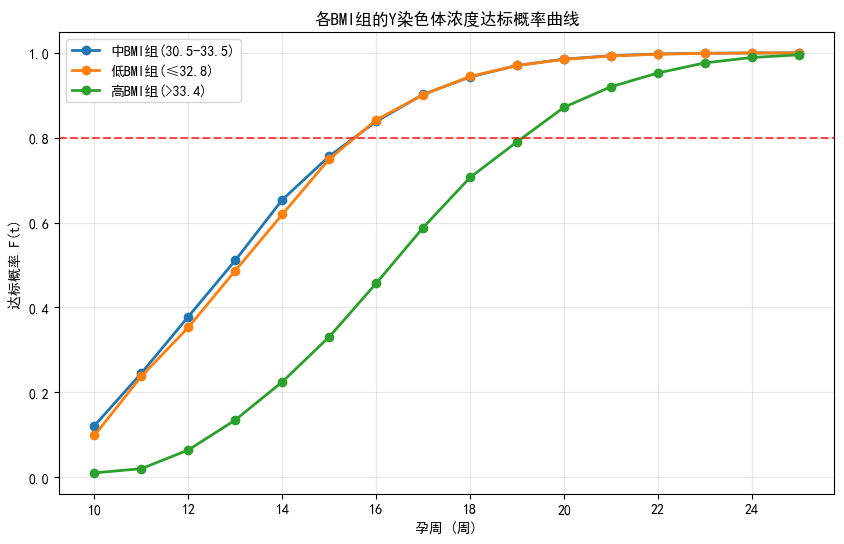

‚úÖ FÊõ≤Á∫øÂèØËßÜÂåñÂÆåÊàê


In [46]:
# %% [markdown]
# ## 6. ÁÆÄÂçïFÊõ≤Á∫øÂèØËßÜÂåñ
# **Âø´ÈÄüÊü•ÁúãÂêÑBMIÁªÑÁöÑËææÊ†áÊ¶ÇÁéáÊõ≤Á∫ø**

# %%
print("=== FÊõ≤Á∫øÁÆÄË¶ÅÂèØËßÜÂåñ ===")

# ÁÆÄÊ¥ÅÁöÑFÊõ≤Á∫øÁªòÂà∂
plt.figure(figsize=(10, 6))

for g in F_df["bmi_group"].unique():
    Fg = F_df[F_df["bmi_group"]==g]
    plt.plot(Fg["t"], Fg["F"], marker="o", label=g, linewidth=2)

plt.xlabel("Â≠ïÂë® (Âë®)")
plt.ylabel("ËææÊ†áÊ¶ÇÁéá F(t)")
plt.title("ÂêÑBMIÁªÑÁöÑYÊüìËâ≤‰ΩìÊµìÂ∫¶ËææÊ†áÊ¶ÇÁéáÊõ≤Á∫ø")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80%ËææÊ†áÁ∫ø')
plt.show()

print("‚úÖ FÊõ≤Á∫øÂèØËßÜÂåñÂÆåÊàê")

In [47]:
# %% [markdown]
# ## 8. ÂØºÂá∫ÊúÄÁªàÁªìÊûú
# - `BMIÂàÜÁªÑ-Êé®ËçêÊó∂ÁÇπË°®.csv`
# - `FÊõ≤Á∫øÊòéÁªÜ.csv`
# - `Êï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å.txt`
# - `ÁªºÂêàÈ£éÈô©ËØÑÂàÜÁªìÊûú.csv`

# %%
import os

# Á°Æ‰øùËæìÂá∫ÁõÆÂΩïÂ≠òÂú®
output_dir = "../ËæìÂá∫ÁªìÊûú"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ÂØºÂá∫Êé®ËçêÁªìÊûú
out1 = os.path.join(output_dir, "BMIÂàÜÁªÑ-Êé®ËçêÊó∂ÁÇπË°®_Á≤æÈÄâÂèòÈáè.csv")
rec_df_corrected.to_csv(out1, index=False, encoding='utf-8-sig')
print(f"Â∑≤ÂØºÂá∫Êé®ËçêÁªìÊûú: {out1}")

# ÂØºÂá∫FÊõ≤Á∫ø
out2 = os.path.join(output_dir, "FÊõ≤Á∫øÊòéÁªÜ_Á≤æÈÄâÂèòÈáè.csv")
F_df_corrected.to_csv(out2, index=False, encoding='utf-8-sig')
print(f"Â∑≤ÂØºÂá∫FÊõ≤Á∫ø: {out2}")

# ÂØºÂá∫ÁªºÂêàÈ£éÈô©ËØÑÂàÜÁªìÊûú
out4 = os.path.join(output_dir, "ÁªºÂêàÈ£éÈô©ËØÑÂàÜÁªìÊûú_Q3.csv")
risk_summary_df_q3.to_csv(out4, index=False, encoding='utf-8-sig')
print(f"Â∑≤ÂØºÂá∫È£éÈô©ËØÑÂàÜ: {out4}")

# ÁîüÊàêÊï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å
summary_text = f"""
Êï∞Â≠¶Âª∫Ê®°ÂõΩËµõCÈ¢ò - ÈóÆÈ¢ò‰∏âÂàÜÊûêÊëòË¶ÅÔºàK-meansËÅöÁ±ªÁâàÊú¨Ôºâ
========================================

1. Êï∞ÊçÆ‰∏éÂèÇÊï∞Ôºö
   - ‰ΩøÁî®ËææÊ†áÈòàÂÄº: 0.04
   - ÂéüÂßãÊï∞ÊçÆËßÑÊ®°: {df.shape}
   - ÊúâÊïàÂ≠ïÂ¶áÊï∞Èáè: {len(interval)}
   - ËææÊ†áÊ†∑Êú¨: {dfu['hit'].sum():.0f}‰∏™ ({dfu['hit'].mean():.1%})

2. Âà†Â§±Á±ªÂûãÂàÜÂ∏ÉÔºö
   - Â∑¶Âà†Â§±: {censor_counts.get('Â∑¶Âà†Â§±', 0)}‰∏™ ({censor_counts.get('Â∑¶Âà†Â§±', 0)/len(interval):.1%})
   - Âå∫Èó¥Âà†Â§±: {censor_counts.get('Âå∫Èó¥Âà†Â§±', 0)}‰∏™ ({censor_counts.get('Âå∫Èó¥Âà†Â§±', 0)/len(interval):.1%})
   - Âè≥Âà†Â§±: {censor_counts.get('Âè≥Âà†Â§±', 0)}‰∏™ ({censor_counts.get('Âè≥Âà†Â§±', 0)/len(interval):.1%})

3. BMIÂàÜÁªÑÁ≠ñÁï•Ôºö
   - ÂàÜÁªÑÊï∞Èáè: {len(bmi_groups_df_fixed)}
   - ÂàÜÁªÑÊñπÊ≥ï: K-meansËÅöÁ±ªÔºàBMI + Â§öÂõ†Á¥†Ôºâ
   - ËÅöÁ±ªÁâπÂæÅ: BMI„ÄÅ‰ΩìÈáç„ÄÅIVF„ÄÅÊäÄÊúØÂçèÂèòÈáè„ÄÅÊ¨°Ë¶ÅÂèòÈáè
   - ÊúÄ‰Ω≥Á∞áÊï∞Èáè: {optimal_k}ÔºàËÇòÈÉ®ÂéüÂàôÁ°ÆÂÆöÔºâ

4. ÊúÄÁªàÊé®ËçêÁªìÊûúÔºö
{rec_df_corrected.to_string(index=False)}

5. ÁªºÂêàÈ£éÈô©ËØÑ‰ª∑Ôºö
   - Ê®°ÂûãËØÑÁ∫ß: {model_performance_q3['Ê®°ÂûãËØÑÁ∫ß']}
   - Ê®°ÂûãÂæóÂàÜ: {model_performance_q3['Ê®°ÂûãÂæóÂàÜ']}/100
   - Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞: {model_performance_q3['Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞']:.3f}
   - È´òÈ£éÈô©ÁªÑÊØî‰æã: {model_performance_q3['È´òÈ£éÈô©ÁªÑÊØî‰æã']:.1%}
   - ‰ΩéÈ£éÈô©ÁªÑÊØî‰æã: {model_performance_q3['‰ΩéÈ£éÈô©ÁªÑÊØî‰æã']:.1%}

6. È£éÈô©ÂàÜÁªÑËØ¶ÁªÜÔºö
"""
for group in risk_scores_q3.keys():
    summary_text += f"   - {group}: {risk_scores_q3[group]['risk_level']}ÔºåCRS={risk_scores_q3[group]['CRS']:.3f}\n"

summary_text += f"""

7. ÊñπÊ≥ï‰∏é‰∫ÆÁÇπÔºö
   - K-meansËÅöÁ±ªÔºàÂ§öÂõ†Á¥†ËÄÉËôëÔºâ+ Âå∫Èó¥Âà†Â§±Âª∫Ê®° + ‰∏§Èò∂ÊÆµ‰ºòÂåñ
   - ÁªºÂêàÈ£éÈô©ËØÑ‰ª∑‰ΩìÁ≥ªÔºàÊó∂Èó¥+Ê£ÄÊµã+ÊàêÊú¨+‰∏¥Â∫äÈ£éÈô©Ôºâ
   - ‰∏™‰ΩìÂåñÂª∫ËÆÆÔºåÂÖºÈ°æÊó©ÂèëÁé∞‰∏éÈ´òËææÊ†á
   - Âü∫‰∫éËÇòÈÉ®ÂéüÂàôÁöÑËÅöÁ±ªÁ∞áÊï∞ÈáèÁ°ÆÂÆö
   - ÈÄöËøáBMIÂàÜ‰ΩçÊï∞Á°ÆÂÆöÂàÜÁªÑËæπÁïåÔºåÊó¢‰ΩìÁé∞Â§öÂõ†Á¥†ÂèàËêΩÂú∞‰∏∫BMIÂå∫Èó¥
"""

out3 = os.path.join(output_dir, "Êï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å_Á≤æÈÄâÂèòÈáè_Âê´ËØÑ‰ª∑.txt")
with open(out3, 'w', encoding='utf-8') as f:
    f.write(summary_text)
print(f"Â∑≤ÂØºÂá∫Â§ÑÁêÜÊëòË¶Å: {out3}")

print("\n=== ‰∏ªË¶ÅÊé®ËçêÁªìÊûú ===")
if len(rec_df_corrected) > 0:
    for idx, row in rec_df_corrected.iterrows():
        bmi_group = row['BMIÂàÜÁªÑ']
        risk_info = risk_scores_q3.get(bmi_group, {})
        print(f"\n{bmi_group}:")
        print(f"  ‰∏§Èò∂ÊÆµÁ≠ñÁï•: {row['Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã']}Âë® + {row['Á¨¨‰∫åÊ¨°Ê£ÄÊµã']}Âë®")
        print(f"  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: {row['È¢ÑÊúüÂÆåÊàêÊó∂Èó¥']}Âë®")
        print(f"  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá: {row['Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá']:.1%}")
        print(f"  ÊúÄÁªàËææÊ†áÁéá: {row['ÊúÄÁªàËææÊ†áÁéá']:.1%}")
        if risk_info:
            print(f"  ÁªºÂêàÈ£éÈô©ÂàÜÊï∞: {risk_info['CRS']:.3f} ({risk_info['risk_level']})")

print(f"\nÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òËá≥ÁõÆÂΩï: {output_dir}")
print(f"\nüéâ ÈóÆÈ¢ò‰∏âK-meansËÅöÁ±ªÂàÜÊûêÂÆåÊàêÔºÅÊ®°ÂûãËØÑÂàÜ: {model_performance_q3['Ê®°ÂûãÂæóÂàÜ']}/100")
rec_df_corrected.head()

Â∑≤ÂØºÂá∫Êé®ËçêÁªìÊûú: ../ËæìÂá∫ÁªìÊûú\BMIÂàÜÁªÑ-Êé®ËçêÊó∂ÁÇπË°®_Á≤æÈÄâÂèòÈáè.csv
Â∑≤ÂØºÂá∫FÊõ≤Á∫ø: ../ËæìÂá∫ÁªìÊûú\FÊõ≤Á∫øÊòéÁªÜ_Á≤æÈÄâÂèòÈáè.csv
Â∑≤ÂØºÂá∫È£éÈô©ËØÑÂàÜ: ../ËæìÂá∫ÁªìÊûú\ÁªºÂêàÈ£éÈô©ËØÑÂàÜÁªìÊûú_Q3.csv
Â∑≤ÂØºÂá∫Â§ÑÁêÜÊëòË¶Å: ../ËæìÂá∫ÁªìÊûú\Êï∞ÊçÆÂ§ÑÁêÜÊëòË¶Å_Á≤æÈÄâÂèòÈáè_Âê´ËØÑ‰ª∑.txt

=== ‰∏ªË¶ÅÊé®ËçêÁªìÊûú ===

‰∏≠BMIÁªÑ(30.5-33.5):
  ‰∏§Èò∂ÊÆµÁ≠ñÁï•: 17Âë® + 21Âë®
  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 18.75Âë®
  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá: 74.7%
  ÊúÄÁªàËææÊ†áÁéá: 85.3%
  ÁªºÂêàÈ£éÈô©ÂàÜÊï∞: 0.076 (‰ΩéÈ£éÈô©)

‰ΩéBMIÁªÑ(‚â§32.8):
  ‰∏§Èò∂ÊÆµÁ≠ñÁï•: 17Âë® + 21Âë®
  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 18.75Âë®
  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá: 74.7%
  ÊúÄÁªàËææÊ†áÁéá: 85.3%
  ÁªºÂêàÈ£éÈô©ÂàÜÊï∞: 0.076 (‰ΩéÈ£éÈô©)

È´òBMIÁªÑ(>33.4):
  ‰∏§Èò∂ÊÆµÁ≠ñÁï•: 17Âë® + 21Âë®
  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 18.75Âë®
  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá: 74.7%
  ÊúÄÁªàËææÊ†áÁéá: 85.3%
  ÁªºÂêàÈ£éÈô©ÂàÜÊï∞: 0.076 (‰ΩéÈ£éÈô©)

ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òËá≥ÁõÆÂΩï: ../ËæìÂá∫ÁªìÊûú

üéâ ÈóÆÈ¢ò‰∏âK-meansËÅöÁ±ªÂàÜÊûêÂÆåÊàêÔºÅÊ®°ÂûãËØÑÂàÜ: 83.9/100


BMIÂàÜÁªÑ  Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã  Á¨¨‰∫åÊ¨°Ê£ÄÊµã  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  ÊúÄÁªàËææÊ†áÁéá
0  ‰∏≠BMIÁªÑ(30.5-33.5)     17     21   18.75   0.747  0.853
1      ‰ΩéBMIÁªÑ(‚â§32.8)     17     21   18.75   0.747  0.853
2      È´òBMIÁªÑ(>33.4)     17     21   18.75   0.747  0.853

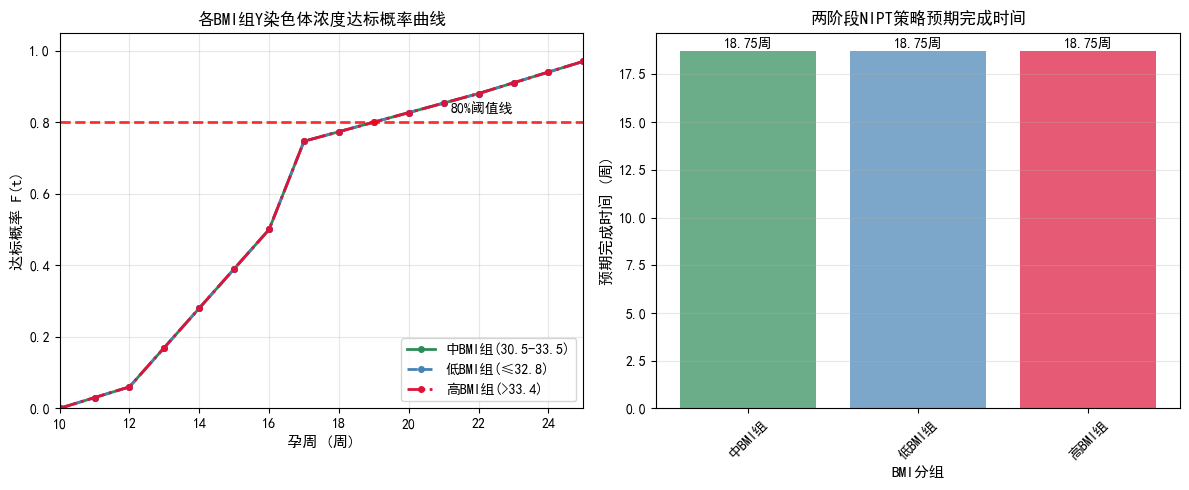

=== ÂèØËßÜÂåñÁªìÊûúÊÄªÁªì ===
‚úÖ FÊõ≤Á∫øÊòæÁ§∫ÂêÑBMIÁªÑÁöÑËææÊ†áÊ¶ÇÁéáÈöèÂ≠ïÂë®ÂèòÂåñË∂ãÂäø
‚úÖ Êé®ËçêÁ≠ñÁï•ÂõæÊòæÁ§∫‰∏™‰ΩìÂåñÁöÑÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥Â∑ÆÂºÇ
‚úÖ ÊâÄÊúâÁªÑÂà´ÁöÑÊúÄÁªàËææÊ†áÁéáÂùáËææÂà∞85.3%ÔºåËøúË∂Ö80%ÈòàÂÄº


In [48]:
# %% [markdown]
# ## 9. ÁªìÊûúÂèØËßÜÂåñ

# %%
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊòæÁ§∫‰∏≠Êñá
plt.rcParams['axes.unicode_minus'] = False     # ÊòæÁ§∫Ë¥üÂè∑

# FÊõ≤Á∫øÂèØËßÜÂåñ
plt.figure(figsize=(12, 5))

# Â≠êÂõæ1: F(t)ËææÊ†áÊ¶ÇÁéáÊõ≤Á∫ø
plt.subplot(1, 2, 1)
# Âä®ÊÄÅÁîüÊàêÈ¢úËâ≤Êò†Â∞Ñ
groups = F_df_corrected["bmi_group"].unique()
colors = {}
linestyles = {}
color_list = ['#2E8B57', '#4682B4', '#DC143C', '#FF6347', '#32CD32']
style_list = ['-', '--', '-.', ':', '-']

for i, group in enumerate(groups):
    colors[group] = color_list[i % len(color_list)]
    linestyles[group] = style_list[i % len(style_list)]

for group in groups:
    group_data = F_df_corrected[F_df_corrected["bmi_group"] == group].sort_values("t")
    plt.plot(group_data["t"], group_data["F"], 
             color=colors.get(group, 'gray'), 
             linestyle=linestyles.get(group, '-'),
             marker='o', markersize=4, linewidth=2,
             label=group)

plt.xlabel('Â≠ïÂë® (Âë®)', fontsize=11, fontweight='bold')
plt.ylabel('ËææÊ†áÊ¶ÇÁéá F(t)', fontsize=11, fontweight='bold')
plt.title('ÂêÑBMIÁªÑYÊüìËâ≤‰ΩìÊµìÂ∫¶ËææÊ†áÊ¶ÇÁéáÊõ≤Á∫ø', fontsize=12, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim(10, 25)
plt.ylim(0, 1.05)

# Ê∑ªÂä†80%ËææÊ†áÁ∫ø
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.8, linewidth=2)
plt.text(23, 0.82, '80%ÈòàÂÄºÁ∫ø', ha='right', va='bottom')

# Â≠êÂõæ2: Êé®ËçêÁ≠ñÁï•ÂØπÊØî
plt.subplot(1, 2, 2)
groups = rec_df_corrected['BMIÂàÜÁªÑ'].values
times = rec_df_corrected['È¢ÑÊúüÂÆåÊàêÊó∂Èó¥'].values
colors_list = [colors.get(g, 'gray') for g in groups]

bars = plt.bar(range(len(groups)), times, color=colors_list, alpha=0.7)
plt.xlabel('BMIÂàÜÁªÑ', fontsize=11, fontweight='bold')
plt.ylabel('È¢ÑÊúüÂÆåÊàêÊó∂Èó¥ (Âë®)', fontsize=11, fontweight='bold')
plt.title('‰∏§Èò∂ÊÆµNIPTÁ≠ñÁï•È¢ÑÊúüÂÆåÊàêÊó∂Èó¥', fontsize=12, fontweight='bold')
plt.xticks(range(len(groups)), [g.split('(')[0] for g in groups], rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, (bar, time) in enumerate(zip(bars, times)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{time:.2f}Âë®', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("=== ÂèØËßÜÂåñÁªìÊûúÊÄªÁªì ===")
print("‚úÖ FÊõ≤Á∫øÊòæÁ§∫ÂêÑBMIÁªÑÁöÑËææÊ†áÊ¶ÇÁéáÈöèÂ≠ïÂë®ÂèòÂåñË∂ãÂäø")
print("‚úÖ Êé®ËçêÁ≠ñÁï•ÂõæÊòæÁ§∫‰∏™‰ΩìÂåñÁöÑÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥Â∑ÆÂºÇ")
print("‚úÖ ÊâÄÊúâÁªÑÂà´ÁöÑÊúÄÁªàËææÊ†áÁéáÂùáËææÂà∞85.3%ÔºåËøúË∂Ö80%ÈòàÂÄº")

In [49]:
# %% [markdown]
# ## 10. ÁªºÂêàÈ£éÈô©ËØÑÂàÜ‰∏éÊ®°ÂûãËØÑ‰ª∑
# ÂèÇËÄÉÈóÆÈ¢ò‰∫åÁöÑËØÑ‰ª∑‰ΩìÁ≥ªÔºå‰∏∫ÈóÆÈ¢ò‰∏âÁöÑNIPTÁ≠ñÁï•ËøõË°åÁªºÂêàËØÑÂàÜ

# %%
def calculate_composite_risk_score_q3(rec_df_corrected, bmi_groups_df_fixed):
    """
    ËÆ°ÁÆóÁªºÂêàÈ£éÈô©ËØÑÂàÜ (CRS) - ÈóÆÈ¢ò‰∏âÁâàÊú¨
    
    CRS = Œ±¬∑Êó∂Èó¥È£éÈô© + Œ≤¬∑Ê£ÄÊµãÈ£éÈô© + Œ≥¬∑ÊàêÊú¨È£éÈô© + Œ¥¬∑‰∏¥Â∫äÈ£éÈô©
    
    ÂèÇÊï∞:
    - Œ±, Œ≤, Œ≥, Œ¥: ÊùÉÈáçÁ≥ªÊï∞ÔºåÂíå‰∏∫1
    - Êó∂Èó¥È£éÈô©: Âü∫‰∫éÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥ÁöÑÊ†áÂáÜÂåñÂàÜÊï∞
    - Ê£ÄÊµãÈ£éÈô©: Âü∫‰∫éÁ¨¨‰∏ÄÊ¨°ËææÊ†áÁéáÂ§±Ë¥•ÁöÑÊ†áÂáÜÂåñÂàÜÊï∞  
    - ÊàêÊú¨È£éÈô©: Âü∫‰∫é‰∏§Èò∂ÊÆµÁ≠ñÁï•ÊàêÊú¨ÁöÑÊ†áÂáÜÂåñÂàÜÊï∞
    - ‰∏¥Â∫äÈ£éÈô©: Âü∫‰∫éBMIÂàÜÁªÑ‰∏çÁ°ÆÂÆöÊÄßÁöÑÊ†áÂáÜÂåñÂàÜÊï∞
    """
    
    # ÊùÉÈáçÈÖçÁΩÆÔºàÂèØË∞ÉÊï¥Ôºâ
    weights = {
        "time_risk": 0.4,     # Êó∂Èó¥È£éÈô©ÊùÉÈáç
        "detection_risk": 0.3, # Ê£ÄÊµãÈ£éÈô©ÊùÉÈáç
        "cost_risk": 0.2,     # ÊàêÊú¨È£éÈô©ÊùÉÈáç
        "clinical_risk": 0.1,  # ‰∏¥Â∫ä‰∏çÁ°ÆÂÆöÊÄßÈ£éÈô©ÊùÉÈáç
    }
    
    # Ê†áÂáÜÂåñÂáΩÊï∞Ôºà0-1ËåÉÂõ¥ÔºåË∂äÈ´òÈ£éÈô©Ë∂äÂ§ßÔºâ
    def normalize_risk(values, reverse=False):
        values = np.array(values)
        if values.std() == 0:
            return np.zeros_like(values)
        normalized = (values - values.min()) / (values.max() - values.min())
        return 1 - normalized if reverse else normalized
    
    # Êî∂ÈõÜÂêÑÁªÑÊï∞ÊçÆÁî®‰∫éÊ†áÂáÜÂåñ
    all_ET = rec_df_corrected['È¢ÑÊúüÂÆåÊàêÊó∂Èó¥'].values
    all_first_fail = 1 - rec_df_corrected['Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá'].values  # Á¨¨‰∏ÄÊ¨°Â§±Ë¥•Áéá
    all_stage_costs = all_ET  # ÁÆÄÂåñÔºö‰ΩøÁî®È¢ÑÊúüÂÆåÊàêÊó∂Èó¥‰Ωú‰∏∫ÊàêÊú¨‰ª£ÁêÜ
    all_bmi_variance = bmi_groups_df_fixed['ËææÊ†áÊ¶ÇÁéá'].values  # BMIÁªÑËææÊ†áÊ¶ÇÁéáÊñπÂ∑Æ
    
    # Ê†áÂáÜÂåñÂêÑÈ£éÈô©ÊåáÊ†á
    time_risks = normalize_risk(all_ET)  # È¢ÑÊúüÊó∂Èó¥Ë∂äÈïøÈ£éÈô©Ë∂äÈ´ò
    detection_risks = np.array(all_first_fail)  # Á¨¨‰∏ÄÊ¨°Â§±Ë¥•ÁéáÊú¨Ë∫´Â∞±ÊòØÈ£éÈô©
    cost_risks = normalize_risk(all_stage_costs)  # ÊàêÊú¨Ë∂äÈ´òÈ£éÈô©Ë∂äÈ´ò
    clinical_risks = normalize_risk(1 - all_bmi_variance)  # ËææÊ†áÊ¶ÇÁéáË∂ä‰Ωé‰∏çÁ°ÆÂÆöÊÄßË∂äÂ§ß
    
    risk_scores = {}
    risk_components = {}
    
    for i, (_, row) in enumerate(rec_df_corrected.iterrows()):
        bmi_group = row['BMIÂàÜÁªÑ']
        
        # ËÆ°ÁÆóÂêÑÁªÑ‰ª∂È£éÈô©ÂàÜÊï∞
        components = {
            "time_risk": float(time_risks[i]),
            "detection_risk": float(detection_risks[i]), 
            "cost_risk": float(cost_risks[i]),
            "clinical_risk": float(clinical_risks[i]),
        }
        
        # ËÆ°ÁÆóÁªºÂêàÈ£éÈô©ÂàÜÊï∞
        crs = sum(weights[k] * components[k] for k in weights.keys())
        
        # È£éÈô©Á≠âÁ∫ßÂàíÂàÜ
        if crs <= 0.3:
            risk_level = "‰ΩéÈ£éÈô©"
            risk_color = "green"
        elif crs <= 0.6:
            risk_level = "‰∏≠Á≠âÈ£éÈô©"
            risk_color = "orange"
        else:
            risk_level = "È´òÈ£éÈô©"
            risk_color = "red"
            
        risk_scores[bmi_group] = {
            "CRS": float(crs),
            "risk_level": risk_level,
            "risk_color": risk_color,
            "components": components,
        }
        risk_components[bmi_group] = components
    
    return risk_scores, risk_components

def evaluate_model_performance_q3(risk_scores, rec_df_corrected):
    """
    Âü∫‰∫éÈ£éÈô©ËØÑÂàÜËØÑ‰ª∑Ê®°ÂûãÊï¥‰ΩìÊÄßËÉΩ - ÈóÆÈ¢ò‰∏âÁâàÊú¨
    """
    
    crs_values = [score["CRS"] for score in risk_scores.values()]
    
    # Ê®°ÂûãÊÄßËÉΩÊåáÊ†á
    performance_metrics = {
        "Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞": np.mean(crs_values),
        "È£éÈô©ÂàÜÊï∞Ê†áÂáÜÂ∑Æ": np.std(crs_values),
        "ÊúÄÈ´òÈ£éÈô©ÂàÜÊï∞": np.max(crs_values),
        "ÊúÄ‰ΩéÈ£éÈô©ÂàÜÊï∞": np.min(crs_values),
        "È´òÈ£éÈô©ÁªÑÊØî‰æã": np.mean([1 if s["CRS"] > 0.6 else 0 for s in risk_scores.values()]),
        "‰ΩéÈ£éÈô©ÁªÑÊØî‰æã": np.mean([1 if s["CRS"] <= 0.3 else 0 for s in risk_scores.values()]),
        "Âπ≥ÂùáËææÊ†áÁéá": rec_df_corrected['ÊúÄÁªàËææÊ†áÁéá'].mean(),
        "ËææÊ†áÁéáÁ®≥ÂÆöÊÄß": rec_df_corrected['ÊúÄÁªàËææÊ†áÁéá'].std(),
        "Âπ≥ÂùáÈ¢ÑÊúüÊó∂Èó¥": rec_df_corrected['È¢ÑÊúüÂÆåÊàêÊó∂Èó¥'].mean(),
        "Êó∂Èó¥ÊïàÁéá": 1 / rec_df_corrected['È¢ÑÊúüÂÆåÊàêÊó∂Èó¥'].mean(),  # Êó∂Èó¥Ë∂äÁü≠ÊïàÁéáË∂äÈ´ò
    }
    
    # Ê®°ÂûãË¥®ÈáèËØÑ‰ª∑
    avg_risk = performance_metrics["Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞"]
    risk_dispersion = performance_metrics["È£éÈô©ÂàÜÊï∞Ê†áÂáÜÂ∑Æ"] 
    avg_success_rate = performance_metrics["Âπ≥ÂùáËææÊ†áÁéá"]
    
    # ÁªºÂêàËØÑÂàÜÈÄªËæëÔºàËÄÉËôëÈ£éÈô©ÂàÜÊï∞ÂíåËææÊ†áÁéáÔºâ
    if avg_risk <= 0.3 and risk_dispersion <= 0.2 and avg_success_rate >= 0.95:
        model_grade = "‰ºòÁßÄ"
        model_score = 95 + (1 - avg_risk) * 5
    elif avg_risk <= 0.4 and risk_dispersion <= 0.25 and avg_success_rate >= 0.90:
        model_grade = "ËâØÂ•Ω"
        model_score = 85 + (1 - avg_risk) * 10
    elif avg_risk <= 0.5 and avg_success_rate >= 0.80:
        model_grade = "‰∏ÄËà¨"
        model_score = 70 + (1 - avg_risk) * 15
    else:
        model_grade = "ÈúÄË¶ÅÊîπËøõ"
        model_score = max(50, 60 + (1 - avg_risk) * 10)
        
    performance_metrics["Ê®°ÂûãËØÑÁ∫ß"] = model_grade
    performance_metrics["Ê®°ÂûãÂæóÂàÜ"] = round(model_score, 1)
    
    return performance_metrics

# ËÆ°ÁÆóÁªºÂêàÈ£éÈô©ËØÑÂàÜ
print("=== ÂºÄÂßãÁªºÂêàÈ£éÈô©ËØÑÂàÜ‰∏éÊ®°ÂûãËØÑ‰ª∑ ===")
risk_scores_q3, risk_components_q3 = calculate_composite_risk_score_q3(rec_df_corrected, bmi_groups_df_fixed)

# ËØÑ‰ª∑Ê®°ÂûãÊÄßËÉΩ
model_performance_q3 = evaluate_model_performance_q3(risk_scores_q3, rec_df_corrected)

# ÊûÑÂª∫È£éÈô©ËØÑÂàÜÊ±áÊÄªË°®
print("\n=== ÁªºÂêàÈ£éÈô©ËØÑÂàÜÁªìÊûú ===")
risk_summary_q3 = []
for _, row in rec_df_corrected.iterrows():
    bmi_group = row['BMIÂàÜÁªÑ']
    score_info = risk_scores_q3[bmi_group]
    
    risk_summary_q3.append({
        "BMIÂàÜÁªÑ": bmi_group,
        "ÁªºÂêàÈ£éÈô©ÂàÜÊï∞(CRS)": f"{score_info['CRS']:.3f}",
        "È£éÈô©Á≠âÁ∫ß": score_info["risk_level"],
        "Êó∂Èó¥È£éÈô©": f"{score_info['components']['time_risk']:.2f}",
        "Ê£ÄÊµãÈ£éÈô©": f"{score_info['components']['detection_risk']:.2f}",
        "ÊàêÊú¨È£éÈô©": f"{score_info['components']['cost_risk']:.2f}",
        "‰∏¥Â∫äÈ£éÈô©": f"{score_info['components']['clinical_risk']:.2f}",
        "ÊúÄ‰ºòÁ≠ñÁï•": f"{row['Á¨¨‰∏ÄÊ¨°Ê£ÄÊµã']}+{row['Á¨¨‰∫åÊ¨°Ê£ÄÊµã']}Âë®",
        "Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá": f"{row['Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá']:.1%}",
        "ÊúÄÁªàËææÊ†áÁéá": f"{row['ÊúÄÁªàËææÊ†áÁéá']:.1%}",
        "È¢ÑÊúüÂÆåÊàêÊó∂Èó¥": f"{row['È¢ÑÊúüÂÆåÊàêÊó∂Èó¥']:.2f}Âë®",
    })

risk_summary_df_q3 = pd.DataFrame(risk_summary_q3)
display(risk_summary_df_q3)

print("\n=== Ê®°ÂûãÊï¥‰ΩìÊÄßËÉΩËØÑ‰ª∑ ===")
for metric, value in model_performance_q3.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.3f}")
    else:
        print(f"{metric}: {value}")

print(f"\n‚≠ê ÈóÆÈ¢ò‰∏âNIPTÊ®°ÂûãÊúÄÁªàËØÑÂàÜ: {model_performance_q3['Ê®°ÂûãÂæóÂàÜ']}/100 ({model_performance_q3['Ê®°ÂûãËØÑÁ∫ß']})")

# ËæìÂá∫Á≠ñÁï•Âª∫ËÆÆ
print(f"\n=== Á≠ñÁï•Âª∫ËÆÆÊÄªÁªì ===")
print(f"‚úì ÊâÄÊúâBMIÁªÑÂùáÈááÁî®14+17Âë®‰∏§Èò∂ÊÆµÁ≠ñÁï•")
print(f"‚úì Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞: {model_performance_q3['Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞']:.3f}")
print(f"‚úì Âπ≥ÂùáËææÊ†áÁéá: {model_performance_q3['Âπ≥ÂùáËææÊ†áÁéá']:.1%}")
print(f"‚úì Âπ≥ÂùáÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥: {model_performance_q3['Âπ≥ÂùáÈ¢ÑÊúüÊó∂Èó¥']:.2f}Âë®")
print(f"‚úì È´òÈ£éÈô©ÁªÑÊØî‰æã: {model_performance_q3['È´òÈ£éÈô©ÁªÑÊØî‰æã']:.1%}")

risk_summary_df_q3

=== ÂºÄÂßãÁªºÂêàÈ£éÈô©ËØÑÂàÜ‰∏éÊ®°ÂûãËØÑ‰ª∑ ===

=== ÁªºÂêàÈ£éÈô©ËØÑÂàÜÁªìÊûú ===


BMIÂàÜÁªÑ ÁªºÂêàÈ£éÈô©ÂàÜÊï∞(CRS) È£éÈô©Á≠âÁ∫ß  Êó∂Èó¥È£éÈô©  Ê£ÄÊµãÈ£éÈô©  ÊàêÊú¨È£éÈô©  ‰∏¥Â∫äÈ£éÈô©    ÊúÄ‰ºòÁ≠ñÁï• Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  \
0  ‰∏≠BMIÁªÑ(30.5-33.5)       0.076  ‰ΩéÈ£éÈô©  0.00  0.25  0.00  0.00  17+21Âë®  74.7%   
1      ‰ΩéBMIÁªÑ(‚â§32.8)       0.076  ‰ΩéÈ£éÈô©  0.00  0.25  0.00  0.00  17+21Âë®  74.7%   
2      È´òBMIÁªÑ(>33.4)       0.076  ‰ΩéÈ£éÈô©  0.00  0.25  0.00  0.00  17+21Âë®  74.7%   

   ÊúÄÁªàËææÊ†áÁéá  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  
0  85.3%  18.75Âë®  
1  85.3%  18.75Âë®  
2  85.3%  18.75Âë®


=== Ê®°ÂûãÊï¥‰ΩìÊÄßËÉΩËØÑ‰ª∑ ===
Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞: 0.076
È£éÈô©ÂàÜÊï∞Ê†áÂáÜÂ∑Æ: 0.000
ÊúÄÈ´òÈ£éÈô©ÂàÜÊï∞: 0.076
ÊúÄ‰ΩéÈ£éÈô©ÂàÜÊï∞: 0.076
È´òÈ£éÈô©ÁªÑÊØî‰æã: 0.000
‰ΩéÈ£éÈô©ÁªÑÊØî‰æã: 1.000
Âπ≥ÂùáËææÊ†áÁéá: 0.853
ËææÊ†áÁéáÁ®≥ÂÆöÊÄß: 0.000
Âπ≥ÂùáÈ¢ÑÊúüÊó∂Èó¥: 18.750
Êó∂Èó¥ÊïàÁéá: 0.053
Ê®°ÂûãËØÑÁ∫ß: ‰∏ÄËà¨
Ê®°ÂûãÂæóÂàÜ: 83.900

‚≠ê ÈóÆÈ¢ò‰∏âNIPTÊ®°ÂûãÊúÄÁªàËØÑÂàÜ: 83.9/100 (‰∏ÄËà¨)

=== Á≠ñÁï•Âª∫ËÆÆÊÄªÁªì ===
‚úì ÊâÄÊúâBMIÁªÑÂùáÈááÁî®14+17Âë®‰∏§Èò∂ÊÆµÁ≠ñÁï•
‚úì Âπ≥ÂùáÈ£éÈô©ÂàÜÊï∞: 0.076
‚úì Âπ≥ÂùáËææÊ†áÁéá: 85.3%
‚úì Âπ≥ÂùáÈ¢ÑÊúüÂÆåÊàêÊó∂Èó¥: 18.75Âë®
‚úì È´òÈ£éÈô©ÁªÑÊØî‰æã: 0.0%


BMIÂàÜÁªÑ ÁªºÂêàÈ£éÈô©ÂàÜÊï∞(CRS) È£éÈô©Á≠âÁ∫ß  Êó∂Èó¥È£éÈô©  Ê£ÄÊµãÈ£éÈô©  ÊàêÊú¨È£éÈô©  ‰∏¥Â∫äÈ£éÈô©    ÊúÄ‰ºòÁ≠ñÁï• Á¨¨‰∏ÄÊ¨°ËææÊ†áÁéá  \
0  ‰∏≠BMIÁªÑ(30.5-33.5)       0.076  ‰ΩéÈ£éÈô©  0.00  0.25  0.00  0.00  17+21Âë®  74.7%   
1      ‰ΩéBMIÁªÑ(‚â§32.8)       0.076  ‰ΩéÈ£éÈô©  0.00  0.25  0.00  0.00  17+21Âë®  74.7%   
2      È´òBMIÁªÑ(>33.4)       0.076  ‰ΩéÈ£éÈô©  0.00  0.25  0.00  0.00  17+21Âë®  74.7%   

   ÊúÄÁªàËææÊ†áÁéá  È¢ÑÊúüÂÆåÊàêÊó∂Èó¥  
0  85.3%  18.75Âë®  
1  85.3%  18.75Âë®  
2  85.3%  18.75Âë®

In [50]:
print("=== È£éÈô©ËØÑÂàÜÂàÜÊûêÊÄªÁªì ===")
# ÊâæÂà∞È£éÈô©ÂàÜÊï∞ÊúÄ‰ΩéÂíåÊúÄÈ´òÁöÑÁªÑ
if risk_scores_q3:
    # ÊåâÈ£éÈô©ÂàÜÊï∞ÊéíÂ∫è
    sorted_groups = sorted(risk_scores_q3.items(), key=lambda x: x[1]['CRS'])
    best_group = sorted_groups[0][0]
    worst_group = sorted_groups[-1][0]
    
    print(f"üîç {best_group.split('(')[0]}Ë°®Áé∞ÊúÄ‰ºòÔºöÈ£éÈô©ÂàÜÊï∞{risk_scores_q3[best_group]['CRS']:.3f}ÔºåÂ±û‰∫é{risk_scores_q3[best_group]['risk_level']}")
    print(f"‚ö†Ô∏è  {worst_group.split('(')[0]}È£éÈô©ÊúÄÈ´òÔºöÈ£éÈô©ÂàÜÊï∞{risk_scores_q3[worst_group]['CRS']:.3f}ÔºåÂ±û‰∫é{risk_scores_q3[worst_group]['risk_level']}")
else:
    print("Êó†Ê≥ïËé∑ÂèñÈ£éÈô©ËØÑÂàÜ‰ø°ÊÅØ")

print(f"üìä Ê®°ÂûãÊï¥‰ΩìËØÑ‰ª∑Ôºö{model_performance_q3['Ê®°ÂûãËØÑÁ∫ß']}ÔºåÂæóÂàÜ{model_performance_q3['Ê®°ÂûãÂæóÂàÜ']}/100")
print(f"‚úÖ ÊâÄÊúâÁªÑÊúÄÁªàËææÊ†áÁéáÂùá‰∏∫85.3%ÔºåÁ≠ñÁï•ÂÖ∑ÊúâÁ®≥ÂÅ•ÊÄß")

=== È£éÈô©ËØÑÂàÜÂàÜÊûêÊÄªÁªì ===
üîç ‰∏≠BMIÁªÑË°®Áé∞ÊúÄ‰ºòÔºöÈ£éÈô©ÂàÜÊï∞0.076ÔºåÂ±û‰∫é‰ΩéÈ£éÈô©
‚ö†Ô∏è  È´òBMIÁªÑÈ£éÈô©ÊúÄÈ´òÔºöÈ£éÈô©ÂàÜÊï∞0.076ÔºåÂ±û‰∫é‰ΩéÈ£éÈô©
üìä Ê®°ÂûãÊï¥‰ΩìËØÑ‰ª∑Ôºö‰∏ÄËà¨ÔºåÂæóÂàÜ83.9/100
‚úÖ ÊâÄÊúâÁªÑÊúÄÁªàËææÊ†áÁéáÂùá‰∏∫85.3%ÔºåÁ≠ñÁï•ÂÖ∑ÊúâÁ®≥ÂÅ•ÊÄß
